# Анализ рынка видеоигр. Закономерности,    определяющие успешность игры.

# *Краткое описание проекта*

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Для целей анализа данных необходимо получить и обработать информацию из файла games.csv.

# *Содержание*

1 [Чтение данных из файла](#start)

2 [Предобработка данных](#prep)  
2.1 [Проверка на дубликаты](#deldup)  
2.2 [Перевод букв в названиях столбцов в нижний регистр](#low)  
2.3 [Анализ на пропуски и некорректные значения](#null)  
2.3.1 [Пропуски  в стобце 'year_of_release'](#nan_year)  
2.3.2 [Пропуски данных в столбцах 'name' и 'genre'](#null_name)  
2.3.3 [Некорректные значения в столбце 'user_score'](#tbd)  
2.3.4 [Обработка типов данных в столбцах 'year_of_release' и 'user_score'](#type)  
2.3.5 [Обработка пропусков в столбцах 'critic_score', 'user_score' и 'rating'](#nan_score)

3 [Анализ данных](#data)  
3.1 [Зависимость количества новых игр от года релиза](#name_year)  
3.2 [Добавление данных о суммарных продажах](#total_sales)  
3.3 [Анализ зависимости объёмов продаж игр от платформы](#total_sales2)  
3.4 [Анализ времени выпуска игр на каждой платформе](#total_sales3)   
3.5 [Выбор актуального периода](#total_sales5)  

4 [Анализ платформ на актуальном периоде](#actual1)  
4.1 [Анализ платформ на характерные, медианные значения и на "выбросы"](#actual2)  
4.2 [Анализ влияния отзывов на продажи игр](#actual3)  

5 [Анализ жанров видеоигр на актуальном периоде](#genre1)  
5.1 [Анализ количества игр в каждом жанре](#genre2)  
5.2 [Анализ жанров игр на продаваемость](#genre22)  
5.3 [Анализ количества игр в каждом жанре для разных платформ](#genre3)  

6 [Анализ особенностей региона на продажи игр](#region1)  
6.1 [Определение популярных платформ для каждого региона](#region2)  
6.2 [Определение популярных жанров для каждого региона](#region7)  
6.3 [Влияние рейтинга игры ESRB на продажи в каждом регионе](#rating1)  

7 [Проверка гипотез](#hyp1)  
7.1 [Проверка гипотезы о равенстве отзывов пользователей платформ Xbox One и PC](#hyp2)  
7.2 [Проверка гипотезы о равенстве отзывов пользователей для игр жанров Action и Sports](#hyp4)  

8 [Общий вывод](#res)  

<a id="start"></a>
## Чтение данных из файла

Импортируем необходимые библиотеки и прочитаем датафрейм. Путь к файлу: /datasets/games.csv. Выведем на экран основную информацию.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод по разделу 1**.  
Датафрейм состоит из 16715 строк и 11 столбцов, в столбцах отображена следующая информация:



- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). 

В данных обнаружены следующие недостатки:
- Названия столбцов состоят из букв разных регистров, необходимо привести все буквы к нижнему регистру,
- В столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating имеются пропуски - необходим анализ и обработка,
- Столбец Year_of_Release (год выпуска) имеет тип данных float64 - необходимо изменить тип данных на целочисленныйи (int).
- Столбец User_Score (оценка пользователей) имеет тип данных object - необходимо изменить тип данных на вещественный (float64).

<a id="prep"></a>
## Предобработка данных  

<a id="deldup"></a>
### Проверка на дубликаты.

In [5]:
data.duplicated().sum()

0

Дубликатов в датафрейме нет.

<a id="low"></a>
### Перевод букв в названиях столбцов в нижний регистр.

In [6]:
data.columns=data.columns.str.lower()

In [7]:
data.info() # проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Все буквы в названиях столбцов приведены к нижнему регистру.

<a id="null"></a>
### Анализ на пропуски и некорректные значения.

<a id="nan_year"></a>
#### Пропуски  в стобце 'year_of_release'.

Рассмотрим строки датафрейма с пропусками в стобце  'year_of_release':

In [8]:
display(data[data['year_of_release'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Всего имеется 269 строк с пропусками информации о годе выпуска релиза. Вся остальная информация в столбцах различается, таким образом, поскольку системность в пропусках отсутствует, можно предположить, что этот недостаток в данных образовался в случайном порядке, в результате технических сбоев при выгрузке-передаче информации.

Заполниим пропуски в годах релиза наиболее часто встречающимся значением для каждой платформы. Для этого создадим функцию mode(), возвращающую моду (наиболее часто встречающееся значение в наборе чисел). В функции учтём проверку ситуации, когда мод несколько (результат является списком) - в этом случае используем только первое значение:

In [9]:
def mode(arg):
    years = arg.mode()
    if len(years) > 0:
        return years[0]

Создадим список платформ data_modded, сгруппировав исходный датафрейм по платформам, и применив к данным функцию mode():

In [10]:
data_modded = data.groupby('platform')['year_of_release'].apply(mode)

In [11]:
data_modded

platform
2600    1981.0
3DO     1995.0
3DS     2011.0
DC      2000.0
DS      2008.0
GB      2000.0
GBA     2002.0
GC      2002.0
GEN     1994.0
GG      1992.0
N64     1999.0
NES     1986.0
NG      1994.0
PC      2011.0
PCFX    1996.0
PS      1998.0
PS2     2002.0
PS3     2011.0
PS4     2016.0
PSP     2006.0
PSV     2015.0
SAT     1995.0
SCD     1994.0
SNES    1995.0
TG16    1995.0
WS      1999.0
Wii     2009.0
WiiU    2013.0
X360    2011.0
XB      2003.0
XOne    2016.0
Name: year_of_release, dtype: float64

Таким образом, в data_modded получился перечень платформ с наиболее часто встречающимся годом выпуска релиза игры для каждой платформы.

Заполним этими данными пропуски в столбце 'year_of_release' исходного датафрейма. Для этого создадим функцию years_complete(), принимающую в качестве аргумента строку датафрейма, проверяющую наличие/отсутствие данных в столбце 'year_of_release' и возвращающую значение из data_modded (в случае пропуска) либо старое значение в столбце. 

Заполним пропуски в столбце 'year_of_release', применвив функцию years_complete() ко всем строкам исходного датафрейма data.

In [12]:
def years_complete(row):
    if pd.isna(row['year_of_release']):
        return data_modded.loc[row['platform']]
    return row['year_of_release']

data['year_of_release'] = data.apply(years_complete, axis=1)

Визуально проверим заполнение пропусков (строки с индексом 16405 и 16522):

In [13]:
data.query('platform == "GC"').tail(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15987,Trigger Man,GC,2004.0,Shooter,0.01,0.0,0.0,0.0,NaN,tbd,T
16077,Lotus Challenge,GC,2004.0,Racing,0.01,0.0,0.0,0.0,NaN,NaN,NaN
16134,Puyo Pop Fever,GC,2004.0,Puzzle,0.01,0.0,0.0,0.0,72.0,tbd,E
16353,Aquaman: Battle for Atlantis,GC,2003.0,Action,0.01,0.0,0.0,0.0,27.0,3.1,T
16394,Surf's Up,GC,2007.0,Sports,0.01,0.0,0.0,0.0,NaN,tbd,E10+
16405,Freaky Flyers,GC,2002.0,Racing,0.01,0.0,0.0,0.0,69.0,6.5,T
16408,Army Men: Air Combat - The Elite Missions,GC,2003.0,Shooter,0.01,0.0,0.0,0.0,NaN,NaN,NaN
16409,Rally Championship,GC,2003.0,Racing,0.01,0.0,0.0,0.0,63.0,tbd,E
16436,Grooverider: Slot Car Thunder,GC,2003.0,Racing,0.01,0.0,0.0,0.0,49.0,tbd,E
16476,Darkened Skye,GC,2002.0,Adventure,0.01,0.0,0.0,0.0,61.0,6.4,T


In [14]:
data.info() # проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Пропуски в столбце 'year_of_release' заполнены.

<a id="null_name"></a>
#### Пропуски данных в столбцах 'name' и 'genre'.

Рассмотрим строки датафрейма с пропусками в стобце 'name':

In [15]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В данном случае имеет место совпадение: два пропуска в столбцах 'name' и 'genre' находятся в одних и тех же сторках. Это две игры на платформе GEN, выпущенные в 1993 году. Поскольку ценности для дальнейшего анализа данная урезанная информация не представляет, принимаем решение данные две строки удалить:

In [16]:
data = data.dropna(subset=['name']).reset_index(drop=True)

<a id="tbd"></a>
#### Некорректные значения в столбце 'user_score'.  

Рассмотрим значения в столбце 'user_score':

In [17]:
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.9       2
2.3       2
0.7       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Помимо пропусков, в столбце имеется аббревиатура "tbd" (от англ. "to be determined"- "будет определено позже"), то есть в данном случае можно трактовать как "нет данных". Для удобства дальнейшего анализа отсутствующая оценка может быть заменена нулём. При дальнейшем анализе оценок пользователей нулевые (отсутствующие) оценки при необходимости можно будет отфильтровать, дабы не искажать расчетные значения (средние, медианные и т.п.):

In [18]:
data['user_score']=data['user_score'].replace('tbd', '0')

<a id="type"></a>
#### Обработка типов данных в столбцах 'year_of_release' и 'user_score'.  

Для удобства дальнейшего анализа и визуализации изменим тип данных в столбце 'year_of_release' на целочисленный:

In [19]:
data['year_of_release'] = data['year_of_release'].astype('int')

Изменим тип данных в столбце 'user_score' на вещественный:

In [20]:
data['user_score']=data['user_score'].astype('float64')

In [21]:
data.info() # проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


<a id="nan_score"></a>
#### Обработка пропусков в столбцах 'critic_score', 'user_score' и 'rating'.  

Для удобства дальнейшего анализа отсутствующие оценки в столбцах 'critic_score' и 'user_score' могут быть заменены нулём. При дальнейшем анализе оценок критиков и пользователей нулевые (отсутствующие) оценки при необходимости можно будет отфильтровать, дабы не искажать расчетные значения (средние, медианные и т.п.):

In [22]:
data['critic_score'] = data['critic_score'].fillna(0)
data['user_score'] = data['user_score'].fillna(0)

Пропуски в столбце 'rating' заменим значением 'unknown', что будет означать "рейтинг неизвестен/не установлен":

In [23]:
data['rating']=data['rating'].fillna('unknown')

Рассмотрим все значения в столбце 'rating':

In [24]:
data['rating'].value_counts()

unknown    6764
E          3990
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: rating, dtype: int64

В столбце имеются следующие значения рейтинга игр: 

«EC» («Early childhood») — «Для детей младшего возраста»,  
«E» («Everyone») — «Для всех»,  
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»,  
«T» («Teen») — «Для подростков»,  
«M» («Mature») — «Для взрослых»,  
«RP» («Rating Pending») — «Рейтинг ожидается». На дату выгрузки данных рейтинг отсутствует, поэтому **заменим его на значение 'unknown'**      
«K-A» («Kids to Adults») — устаревшее обозначение рейтинга «E». **Заменим значения на 'E'**.

In [25]:
data.loc[data['rating'] == 'RP', 'rating'] = 'unknown'
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

In [26]:
data['rating'].value_counts() # проверка

unknown    6767
E          3993
T          2961
M          1563
E10+       1420
EC            8
AO            1
Name: rating, dtype: int64

In [27]:
data.info() # проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


**Вывод по разделу 2.**

Все пропуски обработаны, типы данных по необходимости изменены. Датафрейм готов к дальнейшему анализу.

<a id="data"></a>
## Анализ данных.

<a id="name_year"></a>
### Зависимость количества выпуска новых игр от года релиза.

Посторим график, отражающий выпуск новых игр (независимо от платформы) по годам.

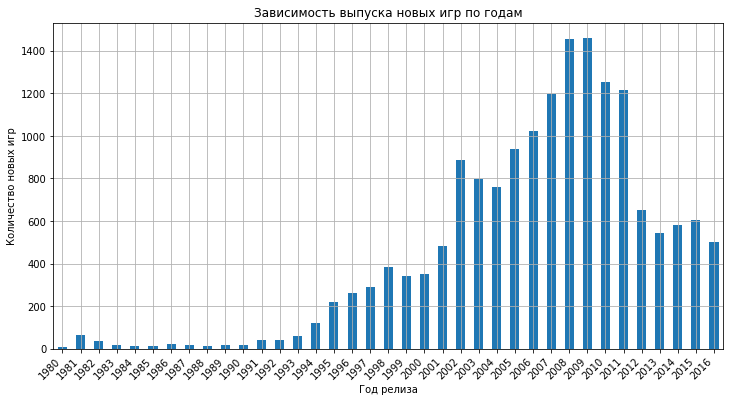

In [28]:
ax = data.\
    pivot_table(index='year_of_release', values='name', aggfunc='count')\
    .plot(kind='bar', figsize=(12, 6), grid=True, legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
plt.title('Зависимость выпуска новых игр по годам')
plt.xlabel('Год релиза')
plt.ylabel('Количество новых игр')
plt.show()

**Вывод.** С начала 1990-х годов количество новых выпущенных игр росло, достигнув пика в 2008-2009 гг. Далее сказались последствия мирового экономического кризиса и последовавшей за ним рецессии, установилась тенденция на удорожание комплектующих для производства ПК и игровых приставок, особенно отразившаяся на видеокартах и графических процессорах, в первую очередь востребованных в индустрии видеоигр. Началась эра "майнинга" криптовалют, также повлиявшая на удорожание комплектующих.  
Как следствие всех вышеперечисленных причин, индустрия видеоигр испытала значительный спад после 2011 года - количество новых игр уменьшилось до уровня начала 2000-х годов. Таким образом, исторически сформировалась текущая актуальная ситуация на рынке видеоигр: 1980-е годы (и ранее) - начало и становление индустрии, 1990-е годы - активный рост, 2000-е годы - расцвет и пик продаж, 2010 год и позднее - спад.

<a id="total_sales"></a>
### Добавление данных о суммарных продажах.

Добавим в исходный датафрейм столбец 'total_sales' с данными о продажах (в млн.копий) суммарно по всем регионам:

In [29]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

<a id="total_sales2"></a>
### Анализ зависимости объёмов продаж игр от платформы.

Сгруппируем данные о суммарных продажах по платформам и построим соответствующий график:

In [30]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64

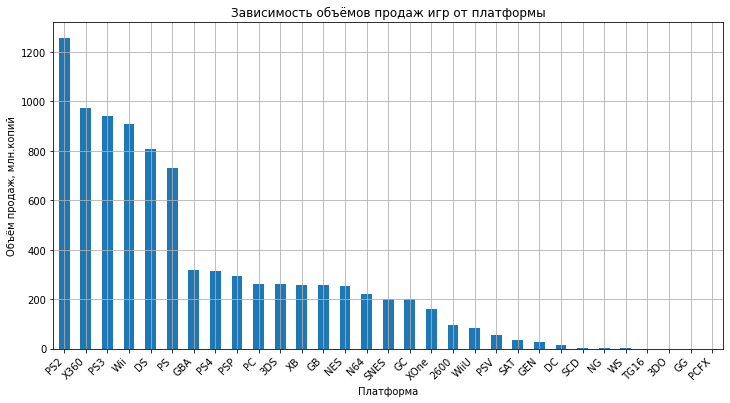

In [31]:
ax = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)\
     .plot(kind='bar', figsize=(12, 6), grid=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
plt.title('Зависимость объёмов продаж игр от платформы')
plt.xlabel('Платформа')
plt.ylabel('Объём продаж, млн.копий')
plt.show()

**Вывод.** Заметно выделяются по суммарным продажам 6 платформ:
- линейка PlayStation производителя Sony: PS, PS2, PS3,
- портативная система DS и консоль Wii от производителя Nintendo,
- платформа XBox360 от производителя Microsoft.

Обратим внимание на то, что продажи игр для персональных компьютеров (PC) отстают от ТОП-6 в разы.
    

<a id="total_sales3"></a>
### Анализ времени выпуска игр на каждой платформе.

Для систематизации платформ рассмотрим время выпуска игр на каждой платформе. Для учёта динамики продаж по годам построим соответствующие графики по каждой платформе:

In [32]:
# PS

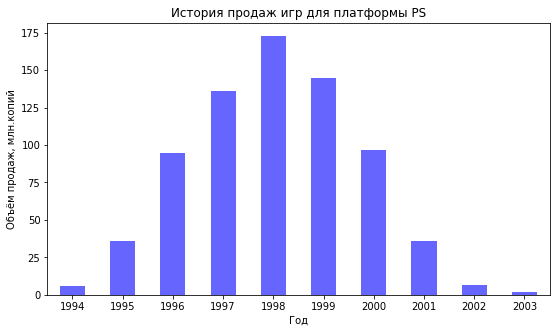

In [33]:
ax = data.query('platform == "PS"')\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', color='blue', alpha=0.6, figsize=(9, 5), legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
plt.title('История продаж игр для платформы PS')
plt.xlabel('Год')
plt.ylabel('Объём продаж, млн.копий')
plt.show()

In [34]:
# PS2

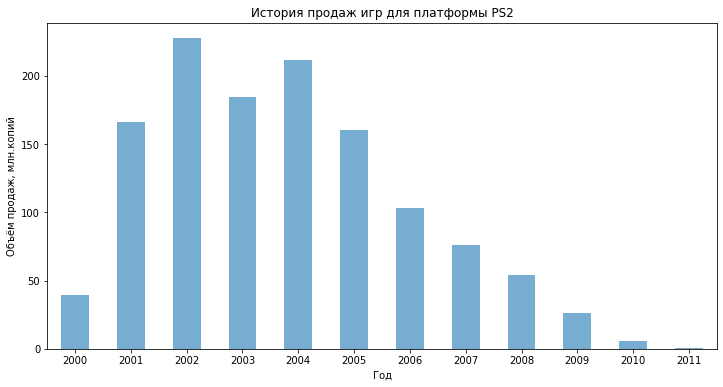

In [35]:
ax = data.query('platform == "PS2"')\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', alpha=0.6, figsize=(12, 6), legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
plt.title('История продаж игр для платформы PS2')
plt.xlabel('Год')
plt.ylabel('Объём продаж, млн.копий')
plt.show()

In [36]:
# PS3

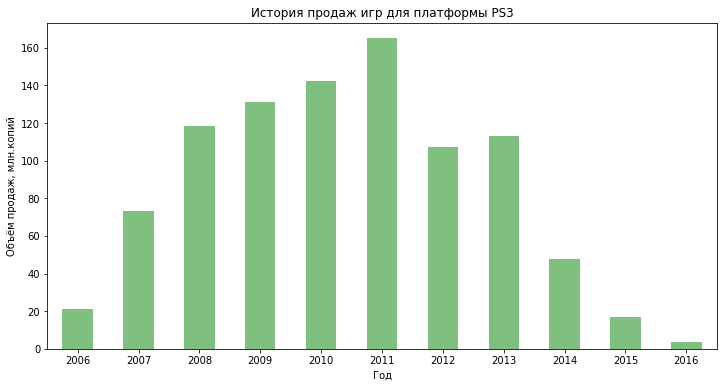

In [37]:
ax = data.query('platform == "PS3"')\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', color='green', alpha=0.5, figsize=(12, 6), legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
plt.title('История продаж игр для платформы PS3')
plt.xlabel('Год')
plt.ylabel('Объём продаж, млн.копий')
plt.show()

In [38]:
# PS4

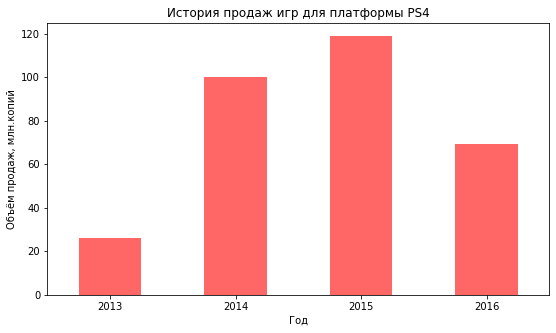

In [39]:
ax = data.query('platform == "PS4"')\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', color='red', alpha=0.6, figsize=(9, 5), legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
plt.title('История продаж игр для платформы PS4')
plt.xlabel('Год')
plt.ylabel('Объём продаж, млн.копий')
plt.show()

In [40]:
# X360

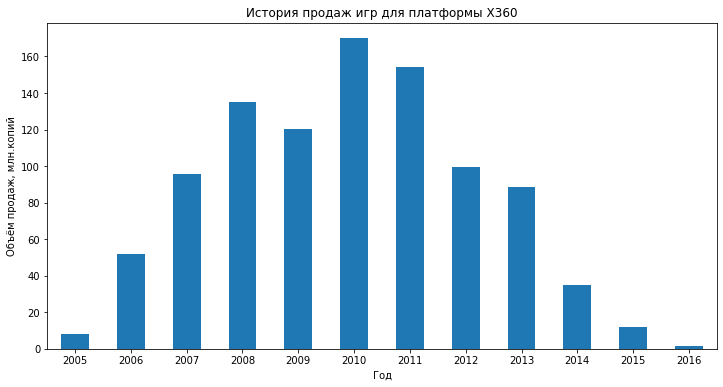

In [41]:
ax = data.query('platform == "X360"')\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', figsize=(12, 6), legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
plt.title('История продаж игр для платформы X360')
plt.xlabel('Год')
plt.ylabel('Объём продаж, млн.копий')
plt.show()

In [42]:
# Wii

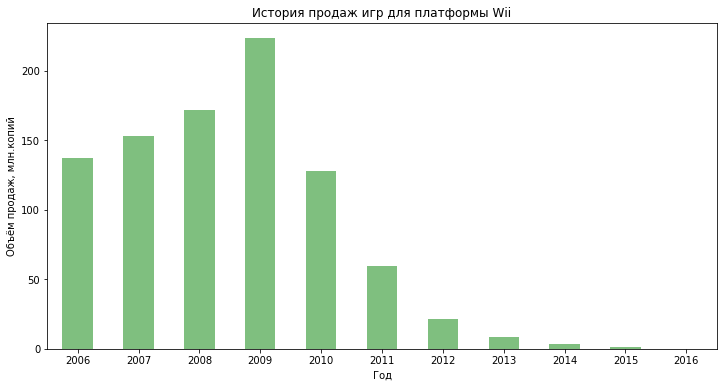

In [43]:
ax = data.query('platform == "Wii"')\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', color='green', alpha=0.5, figsize=(12, 6), legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
plt.title('История продаж игр для платформы Wii')
plt.xlabel('Год')
plt.ylabel('Объём продаж, млн.копий')
plt.show()

In [44]:
# DS

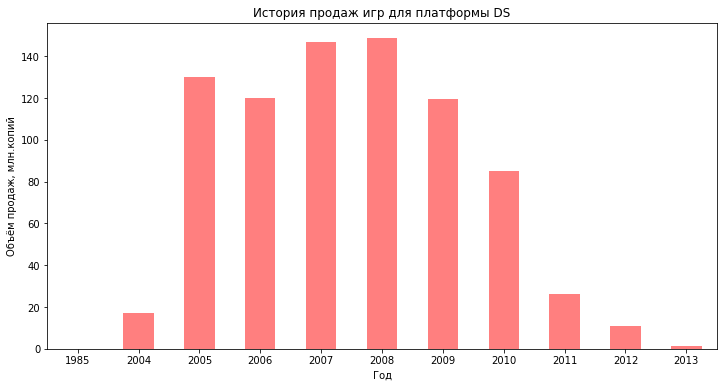

In [45]:
ax = data.query('platform == "DS"')\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', color='red', alpha=0.5, figsize=(12, 6), legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
plt.title('История продаж игр для платформы DS')
plt.xlabel('Год')
plt.ylabel('Объём продаж, млн.копий')
plt.show()

В данных по платформе DS имеется явно некорректная информация: игры в 1985 году для этой платформы не могли выпускаться, т.к. сама платформа выпущена производителем в 2004 году. Рассмотрим строки с некорректной информацией:

In [46]:
data.query('year_of_release == 1985 and platform == "DS"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15955,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,0.0,0.0,unknown,0.02


Поскольку ценности для дальнейшего анализа данная некорректная информация не представляет, принимаем решение данную строку удалить:

In [47]:
data.drop(15955, inplace=True)

In [48]:
data.reset_index(drop=True) # сброс индексов

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16707,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01
16708,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,unknown,0.01
16709,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01
16710,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,unknown,0.01


In [49]:
data.info() # проверка

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16712
Data columns (total 12 columns):
name               16712 non-null object
platform           16712 non-null object
year_of_release    16712 non-null int64
genre              16712 non-null object
na_sales           16712 non-null float64
eu_sales           16712 non-null float64
jp_sales           16712 non-null float64
other_sales        16712 non-null float64
critic_score       16712 non-null float64
user_score         16712 non-null float64
rating             16712 non-null object
total_sales        16712 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


In [50]:
# GBA

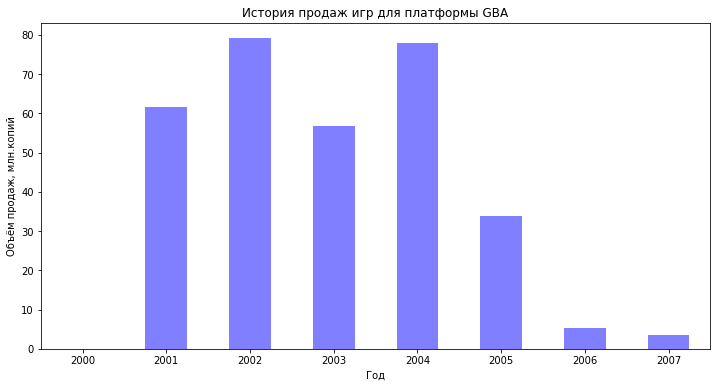

In [51]:
ax = data.query('platform == "GBA"')\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', color='blue', alpha=0.5, figsize=(12, 6), legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
plt.title('История продаж игр для платформы GBA')
plt.xlabel('Год')
plt.ylabel('Объём продаж, млн.копий')
plt.show()

In [52]:
# PSP

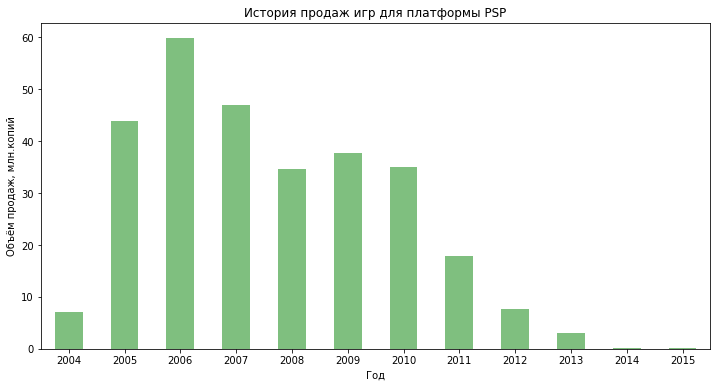

In [53]:
ax = data.query('platform == "PSP"')\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', color='green', alpha=0.5, figsize=(12, 6), legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
plt.title('История продаж игр для платформы PSP')
plt.xlabel('Год')
plt.ylabel('Объём продаж, млн.копий')
plt.show()

In [54]:
# PC

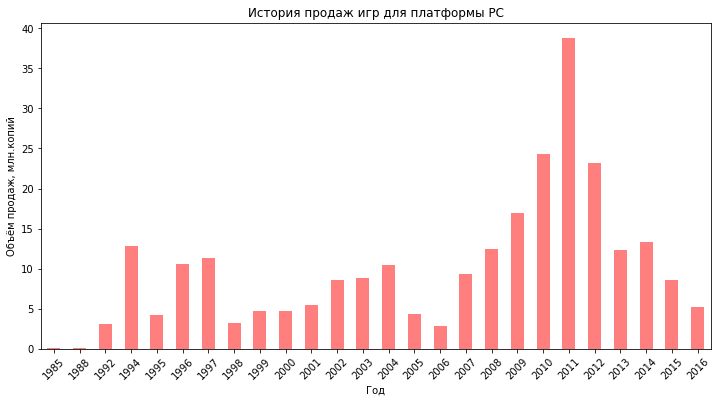

In [55]:
ax = data.query('platform == "PC"')\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', color='red', alpha=0.5, figsize=(12, 6), legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
plt.title('История продаж игр для платформы PC')
plt.xlabel('Год')
plt.ylabel('Объём продаж, млн.копий')
plt.show()

In [56]:
# 3DS

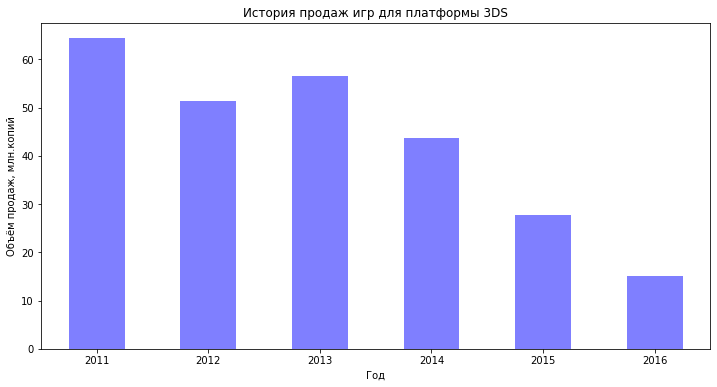

In [57]:
ax = data.query('platform == "3DS"')\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', color='blue', alpha=0.5, figsize=(12, 6), legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
plt.title('История продаж игр для платформы 3DS')
plt.xlabel('Год')
plt.ylabel('Объём продаж, млн.копий')
plt.show()

In [58]:
# XB

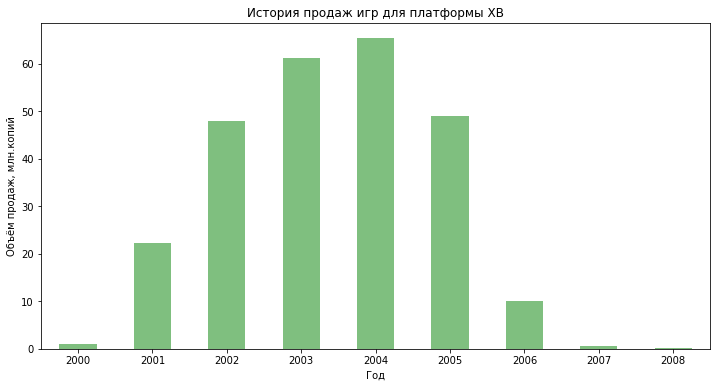

In [59]:
ax = data.query('platform == "XB"')\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', color='green', alpha=0.5, figsize=(12, 6), legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
plt.title('История продаж игр для платформы XB')
plt.xlabel('Год')
plt.ylabel('Объём продаж, млн.копий')
plt.show()

In [60]:
# GB

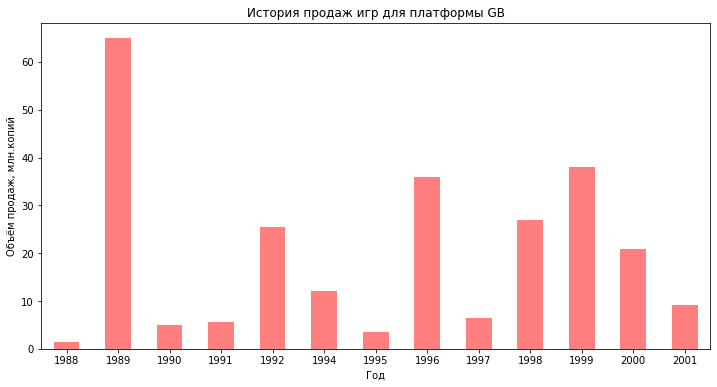

In [61]:
ax = data.query('platform == "GB"')\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', color='red', alpha=0.5, figsize=(12, 6), legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
plt.title('История продаж игр для платформы GB')
plt.xlabel('Год')
plt.ylabel('Объём продаж, млн.копий')
plt.show()

In [62]:
# NES

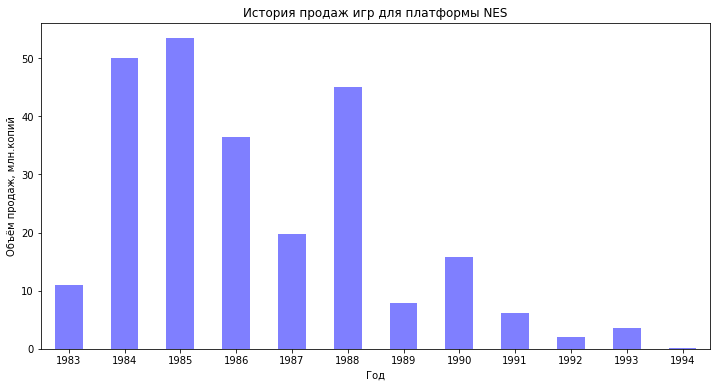

In [63]:
ax = data.query('platform == "NES"')\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', color='blue', alpha=0.5, figsize=(12, 6), legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
plt.title('История продаж игр для платформы NES')
plt.xlabel('Год')
plt.ylabel('Объём продаж, млн.копий')
plt.show()

In [64]:
# N64

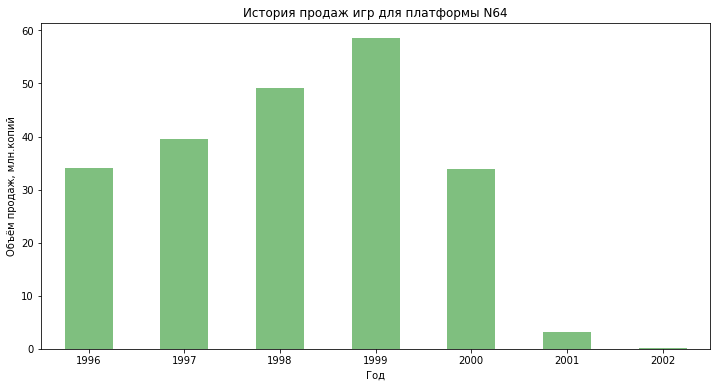

In [65]:
ax = data.query('platform == "N64"')\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', color='green', alpha=0.5, figsize=(12, 6), legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
plt.title('История продаж игр для платформы N64')
plt.xlabel('Год')
plt.ylabel('Объём продаж, млн.копий')
plt.show()

In [66]:
# SNES

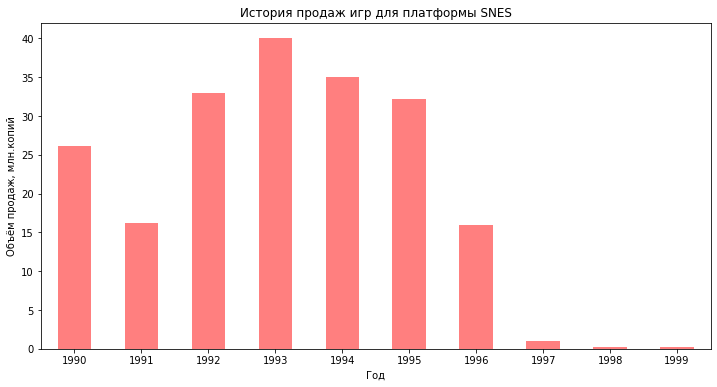

In [67]:
ax = data.query('platform == "SNES"')\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', color='red', alpha=0.5, figsize=(12, 6), legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
plt.title('История продаж игр для платформы SNES')
plt.xlabel('Год')
plt.ylabel('Объём продаж, млн.копий')
plt.show()

In [68]:
# GC

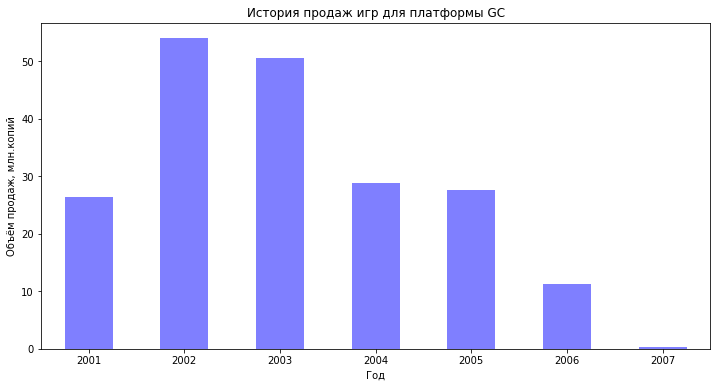

In [69]:
ax = data.query('platform == "GC"')\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', color='blue', alpha=0.5, figsize=(12, 6), legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
plt.title('История продаж игр для платформы GC')
plt.xlabel('Год')
plt.ylabel('Объём продаж, млн.копий')
plt.show()

In [70]:
# XOne

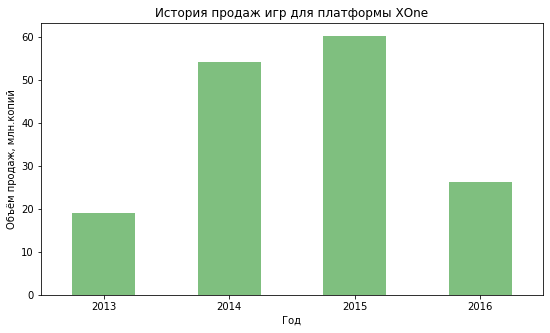

In [71]:
ax = data.query('platform == "XOne"')\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', color='green', alpha=0.5, figsize=(9, 5), legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
plt.title('История продаж игр для платформы XOne')
plt.xlabel('Год')
plt.ylabel('Объём продаж, млн.копий')
plt.show()

In [72]:
# 2600

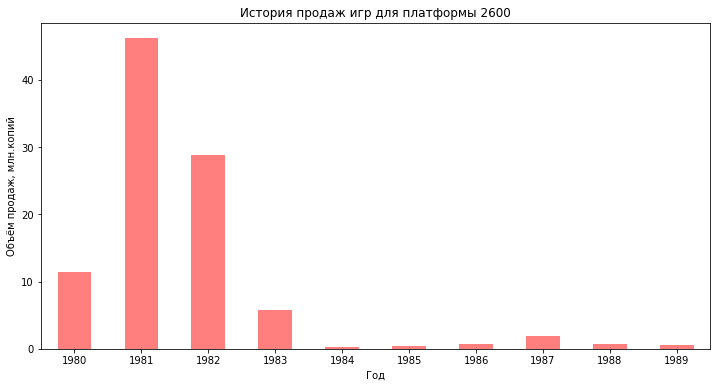

In [73]:
ax = data.query('platform == "2600"')\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', color='red', alpha=0.5, figsize=(12, 6), legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
plt.title('История продаж игр для платформы 2600')
plt.xlabel('Год')
plt.ylabel('Объём продаж, млн.копий')
plt.show()

In [74]:
# WiiU

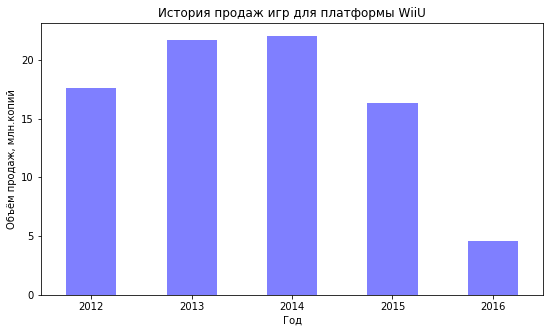

In [75]:
ax = data.query('platform == "WiiU"')\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', color='blue', alpha=0.5, figsize=(9, 5), legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
plt.title('История продаж игр для платформы WiiU')
plt.xlabel('Год')
plt.ylabel('Объём продаж, млн.копий')
plt.show()

In [76]:
# PSV

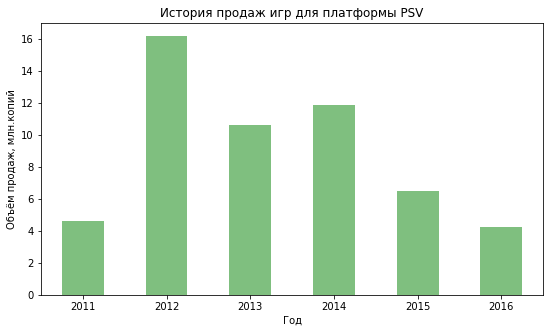

In [77]:
ax = data.query('platform == "PSV"')\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', color='green', alpha=0.5, figsize=(9, 5), legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
plt.title('История продаж игр для платформы PSV')
plt.xlabel('Год')
plt.ylabel('Объём продаж, млн.копий')
plt.show()

In [78]:
# SAT

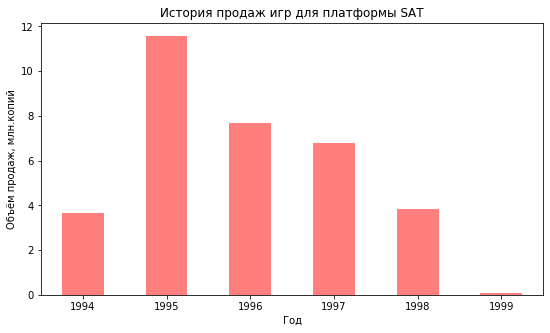

In [79]:
ax = data.query('platform == "SAT"')\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', color='red', alpha=0.5, figsize=(9, 5), legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
plt.title('История продаж игр для платформы SAT')
plt.xlabel('Год')
plt.ylabel('Объём продаж, млн.копий')
plt.show()

In [80]:
# GEN

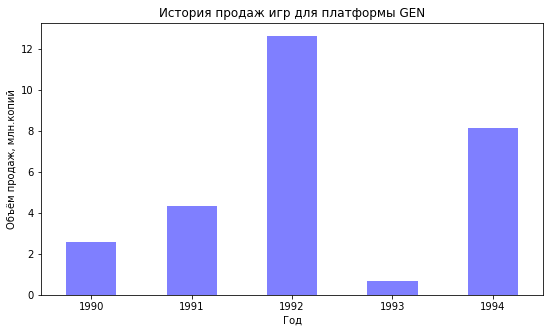

In [81]:
ax = data.query('platform == "GEN"')\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', color='blue', alpha=0.5, figsize=(9, 5), legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
plt.title('История продаж игр для платформы GEN')
plt.xlabel('Год')
plt.ylabel('Объём продаж, млн.копий')
plt.show()

In [82]:
# DC

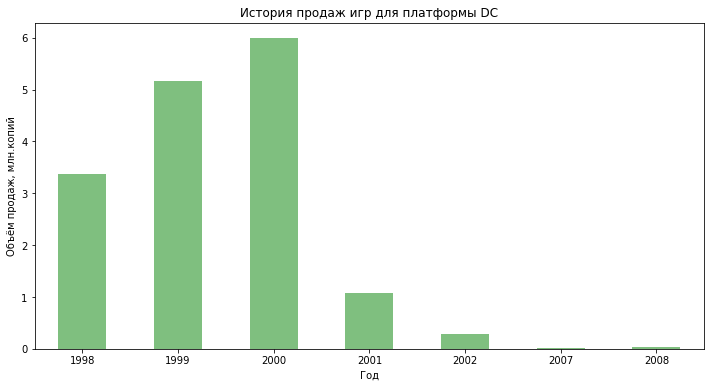

In [83]:
ax = data.query('platform == "DC"')\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', color='green', alpha=0.5, figsize=(12, 6), legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
plt.title('История продаж игр для платформы DC')
plt.xlabel('Год')
plt.ylabel('Объём продаж, млн.копий')
plt.show()

In [84]:
# SCD

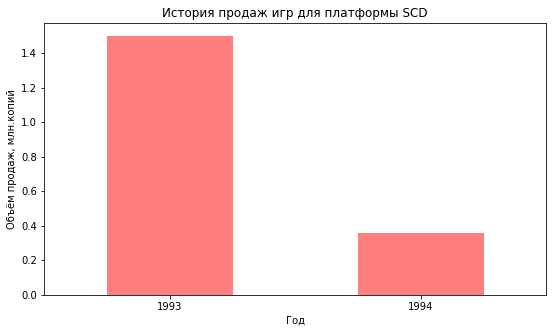

In [85]:
ax = data.query('platform == "SCD"')\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', color='red', alpha=0.5, figsize=(9, 5), legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
plt.title('История продаж игр для платформы SCD')
plt.xlabel('Год')
plt.ylabel('Объём продаж, млн.копий')
plt.show()

In [86]:
# NG

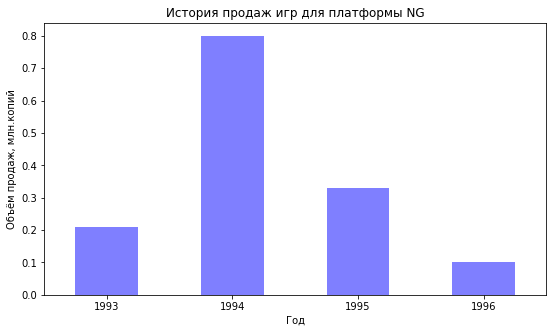

In [87]:
ax = data.query('platform == "NG"')\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', color='blue', alpha=0.5, figsize=(9, 5), legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
plt.title('История продаж игр для платформы NG')
plt.xlabel('Год')
plt.ylabel('Объём продаж, млн.копий')
plt.show()

In [88]:
# WS

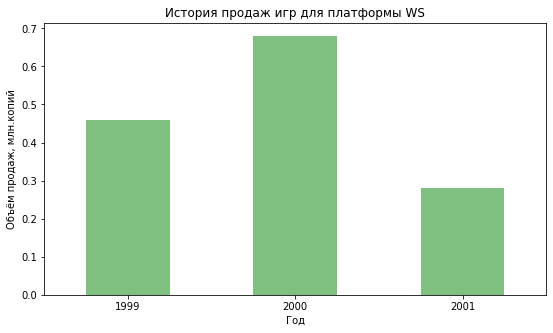

In [89]:
ax = data.query('platform == "WS"')\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', color='green', alpha=0.5, figsize=(9, 5), legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
plt.title('История продаж игр для платформы WS')
plt.xlabel('Год')
plt.ylabel('Объём продаж, млн.копий')
plt.show()

In [90]:
# TG16

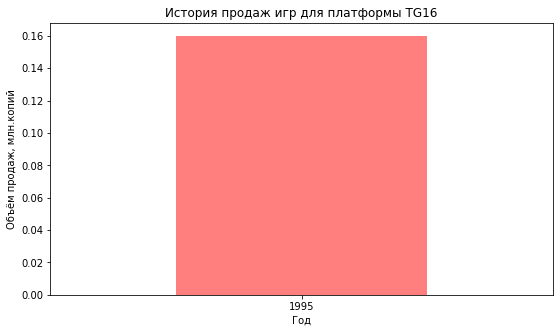

In [91]:
ax = data.query('platform == "TG16"')\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', color='red', alpha=0.5, figsize=(9, 5), legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
plt.title('История продаж игр для платформы TG16')
plt.xlabel('Год')
plt.ylabel('Объём продаж, млн.копий')
plt.show()

In [92]:
# 3DO

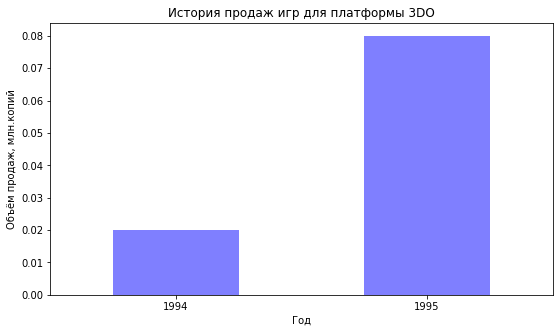

In [93]:
ax = data.query('platform == "3DO"')\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', color='blue', alpha=0.5, figsize=(9, 5), legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
plt.title('История продаж игр для платформы 3DO')
plt.xlabel('Год')
plt.ylabel('Объём продаж, млн.копий')
plt.show()

In [94]:
# GG

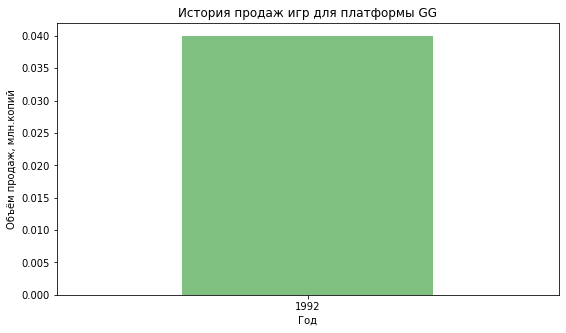

In [95]:
ax = data.query('platform == "GG"')\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', color='green', alpha=0.5, figsize=(9, 5), legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
plt.title('История продаж игр для платформы GG')
plt.xlabel('Год')
plt.ylabel('Объём продаж, млн.копий')
plt.show()

In [96]:
# PCFX

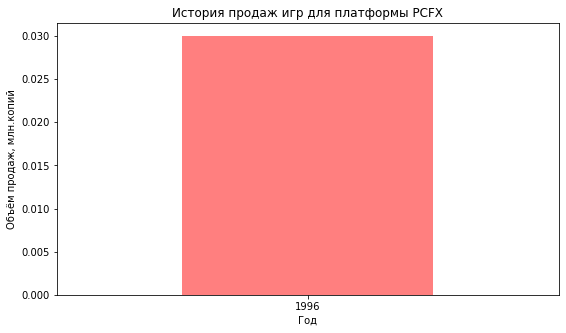

In [97]:
ax = data.query('platform == "PCFX"')\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', color='red', alpha=0.5, figsize=(9, 5), legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
plt.title('История продаж игр для платформы PCFX')
plt.xlabel('Год')
plt.ylabel('Объём продаж, млн.копий')
plt.show()

<a id="total_sales4"></a>
#### Вывод по разделу 3.4.

На основании полученных данных все платформы можно разделить по категориям с точки зрения актуальности информации для текущего периода:


1. Кратковременные продажи: платформы, на которых игры выпускались в 1990-е годы менее 5 лет - GEN, SCD, NG, WS, TG16, 3DO, GG, PCFX.
2. Архивные: большие объёмы продаж, однако потерявшие свою актуальность для текущей ситуации - PS, DC, SAT, 2600, GC, NES, SNES, N64, GB.
3. Нисходящий тренд: серьёзные объёмы продаж главных производителей (Sony, Microsoft, Nintendo), замещенные полностью или частично платформами-новинками нового поколения - Wii, PS2, DS, GBA, XB, PSP.
4. Актуальные и перспективные: PS3, PS4, X360, PSV, WiiU, XOne, PC, 3DS


- Максимальные суммарные продажи за всю историю, ТОП-6: PS, PS2, PS3, X360, Wii, DS

<a id="total_sales5"></a>
### Выбор актуального периода.

Для выбора актуального периода в целях дальнейшего анализа и прогнозирования рассмотрим подробнее на отдельных графиках платформы из двух категорий: низходящий тренд, а также актуальные и перспективные. Кроме того, рассмотрим на графике платформы с наибольшими суммарными продажами.

<a id="total_sales6"></a>
#### Платформы нисходящего тренда.

In [98]:
downtrend = ['Wii', 'PS2', 'DS', 'GBA', 'XB', 'PSP']

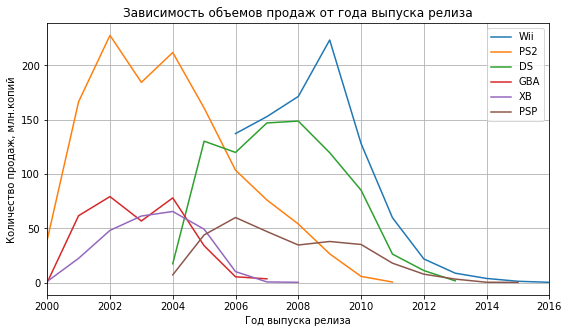

In [99]:
for platform in downtrend:
    (data[data['platform'] == platform]
     .groupby('year_of_release')['total_sales'].sum()
     .plot(grid=True, figsize=(9, 5), label=platform))
plt.title('Зависимость объемов продаж от года выпуска релиза')
plt.xlabel('Год выпуска релиза')
plt.ylabel('Количество продаж, млн.копий')
plt.legend()
plt.show()

**Вывод.** В начале-середине 2000-х годов основные платформы главных производителей: Sony (Play Station2 и портативная PSP), Microsoft (XBox) и Nintendo (Wii и портативные GBA и DS) показывали исторические максимумы по объёмам продаж. Однако все они постепенно к 2015 году были заменены новыми платформами.

<a id="total_sales7"></a>
#### Актуальные и перспективные платформы.

Игры для ПК всегда были и остаются востребованными. На протяжении десятилетий объёмы продаж игр для ПК следуют за общими тенденциями рынка видеоигр. Поэтому обязательно включим в список актуальных платформ PC, однако для наглядности будем строить графики как с учетом игр для PC, так и без них, т.к. история игр для этой платформы слишком длинная, график получается не очень наглядным.

In [100]:
actual_without_PC = ['PS3', 'PS4', 'X360', 'PSV', 'WiiU', 'XOne', '3DS']
actual_with_PC = ['PS3', 'PS4', 'X360', 'PSV', 'WiiU', 'XOne', 'PC', '3DS']

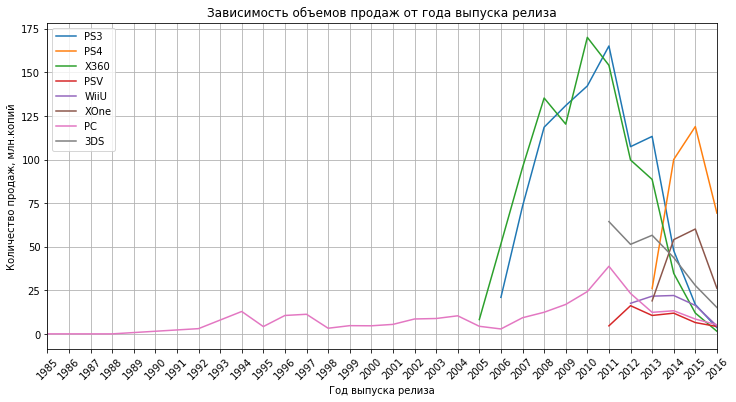

In [101]:
for platform in actual_with_PC:
    (data[data['platform'] == platform]
     .groupby('year_of_release')['total_sales'].sum()
     .plot(grid=True, figsize=(12, 6), label=platform))
plt.xticks(range(1985, 2017), rotation=45)
plt.title('Зависимость объемов продаж от года выпуска релиза')
plt.xlabel('Год выпуска релиза')
plt.ylabel('Количество продаж, млн.копий')
plt.legend()
plt.show()

По данному графику можно судить об актуальности платформы PC (игры для персональных компьютеров). Не считая общего вместе с рынком игр "всплеска" а 2009-2012 годах, игры для ПК десятилетиями продаются на стабильном уровне.  
Более наглядным график получится, если построить его без учета игр для ПК.

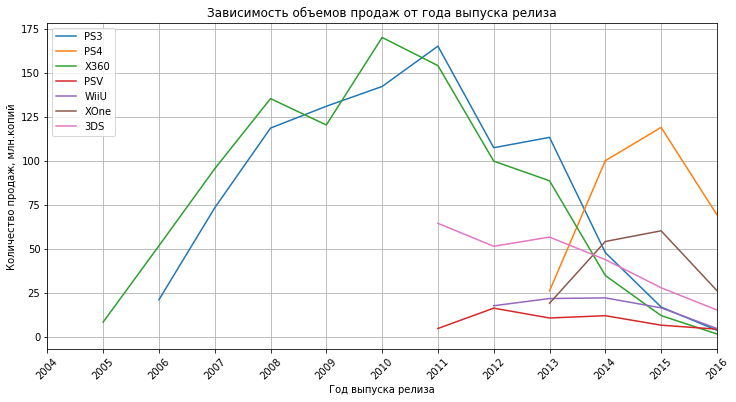

In [102]:
for platform in actual_without_PC:
    (data[data['platform'] == platform]
     .groupby('year_of_release')['total_sales'].sum()
     .plot(grid=True, figsize=(12, 6), label=platform))
plt.xticks(range(2004, 2017), rotation=45)
plt.title('Зависимость объемов продаж от года выпуска релиза')
plt.xlabel('Год выпуска релиза')
plt.ylabel('Количество продаж, млн.копий')
plt.legend()
plt.show()

**Вывод.** Несмотря на падение вслед за рынком игр в целом, основные платформы главных производителей: Sony (Play Station3) и Microsoft (X360) к 2015-2016 годам подошли с хорошими объёмами продаж. Новинки этих производителей PS4 и XOne показывают хороший рост, являются перспективными для активных рекламных кампаний, однако ещё до конца не вытеснили с рынка своих предшественников.  
Новая платформа Nintendo (WiiU) показывает стабильный объём продаж, что говорит о найденной данным производителем нише на рынке. В условиях падающего рынка сохранение объёмов продаж - это в целом неплохой результат для бизнеса.  
Аналогично WiiU ведёт себя и портативная платформа от Sony (PSV) - стабильный объём продаж говорит о стабильности спроса на игры для данной платформы.  
В отличие от PSV, портативная платформа от Nintendo (3DS) падает вслед за рынком и с момента выхода в 2011 году объёмы проданных для этой платформы игр уменьшились практически в 3 раза.

<a id="total_sales8"></a>
#### Платформы с наибольшими суммарными продажами.

Рассмотрим на графике платформы с макимальными суммарными продажами за всю историю:
- линейка PlayStation производителя Sony: PS, PS2, PS3,
- портативная система DS и консоль Wii от производителя Nintendo,
- платформа XBox360 от производителя Microsoft.

In [103]:
max_sales = ['PS', 'PS2', 'PS3', 'X360', 'Wii', 'DS']

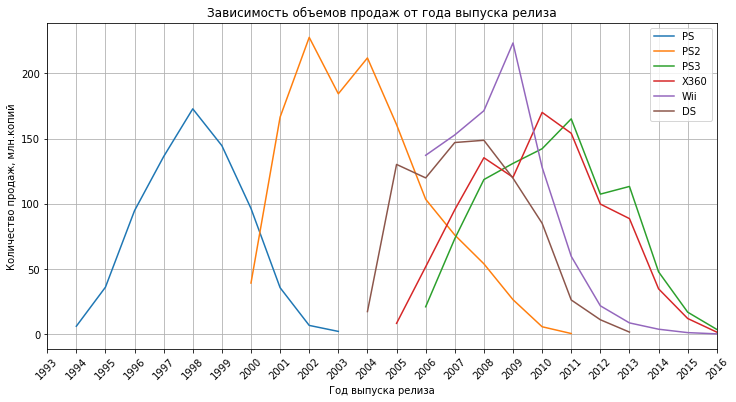

In [104]:
for platform in max_sales:
    (data[data['platform'] == platform]
     .groupby('year_of_release')['total_sales'].sum()
     .plot(grid=True, figsize=(12, 6), label=platform))
plt.xticks(range(1993, 2017), rotation=45)
plt.title('Зависимость объемов продаж от года выпуска релиза')
plt.xlabel('Год выпуска релиза')
plt.ylabel('Количество продаж, млн.копий')
plt.legend()
plt.show()

На данном графике на примере линейки PS видно как ритмично заменяют друг друга платформы одного производителя. Для большей наглядности смены платформ построим отдельные графики для каждого из трёх основных производителей: Sony, Nintendo и Microsoft.

In [105]:
max_sales_history_sony = ['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV']
max_sales_history_microsoft = ['XB', 'X360', 'XOne']
max_sales_history_nintendo = ['GC','Wii', 'WiiU', 'DS', '3DS']

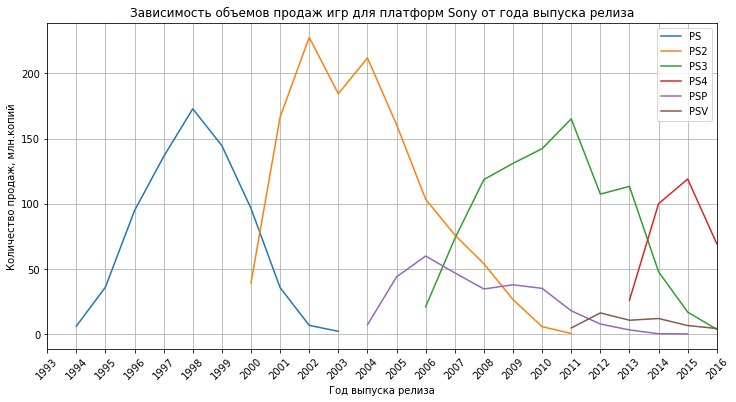

In [106]:
for platform in max_sales_history_sony:
    (data[data['platform'] == platform]
     .groupby('year_of_release')['total_sales'].sum()
     .plot(grid=True, figsize=(12, 6), label=platform))
plt.xticks(range(1993, 2017), rotation=45)
plt.title('Зависимость объемов продаж игр для платформ Sony от года выпуска релиза')
plt.xlabel('Год выпуска релиза')
plt.ylabel('Количество продаж, млн.копий')
plt.legend()
plt.show()

Новые платформы Sony появляются через каждые 6 лет. Новое портативное устройство (PSV) - через 7 лет, после выпуска предыдущего (PSP).

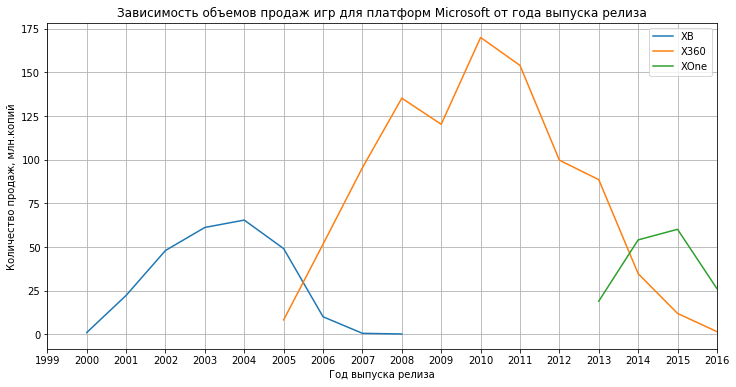

In [107]:
for platform in max_sales_history_microsoft:
    (data[data['platform'] == platform]
     .groupby('year_of_release')['total_sales'].sum()
     .plot(grid=True, figsize=(12, 6), label=platform))
plt.xticks(range(1999, 2017), rotation=0)
plt.title('Зависимость объемов продаж игр для платформ Microsoft от года выпуска релиза')
plt.xlabel('Год выпуска релиза')
plt.ylabel('Количество продаж, млн.копий')
plt.legend()
plt.show()

У Microsoft новинки появились через 5 и 8 лет после выпуска предыдущих (гораздо менее системно и ритмично, чем у Sony).

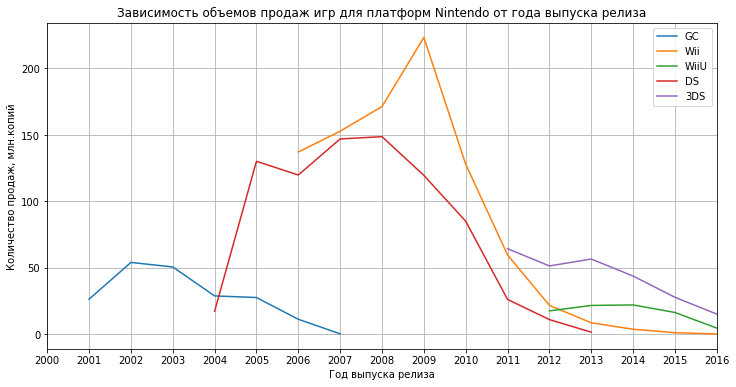

In [108]:
for platform in max_sales_history_nintendo:
    (data[data['platform'] == platform]
     .groupby('year_of_release')['total_sales'].sum()
     .plot(grid=True, figsize=(12, 6), label=platform))
plt.xticks(range(2000, 2017), rotation=0)
plt.title('Зависимость объемов продаж игр для платформ Nintendo от года выпуска релиза')
plt.xlabel('Год выпуска релиза')
plt.ylabel('Количество продаж, млн.копий')
plt.legend()
plt.show()

Ситуация с запуском новых платформ у Nintendo похожа на картину по Sony: новинки консолей выходят каждые 5 лет. Между выпуском двух портативных платформ (DS и 3DS)  прошло 7 лет.

**Вывод.** В среднем по индустрии для трёх главных производителей картина с выпуском новых платформ следующая:  
- Новинки консолей появляются каждые 5-6 лет,
- Новые портативные устройства выходят на рынок каждые 7 лет.

<a id="total_sales9"></a>
#### Определение актуального периода.

С учетом всей ранее полученной информации в целях дальнейшего анализа определим следующий актуальный период действия рынка видеоигр: с 2011 по 2016 год. Аргументация:  
Данный период захватывает последний (2011-й) год расцвета индустрии с пиковыми объёмами продаж, за которым последовал длительный спад рынка. На рассматриваемом периоде появились новые, актуальные на сегодняшний день и перспективные платформы: PS4, PSV, WiiU, XOne, 3DS. Также в течение этого времени (как впрочем и всегда) хорошо продавались игры для персональных компьютеров (платформа PC).

Создадим датафрейм data_actual с данными на актуальном периоде:

In [109]:
data_actual = data.query('platform in @actual_with_PC and year_of_release >= 2011')

<a id="actual1"></a>
## Анализ платформ на актуальном периоде

<a id="actual2"></a>
### Анализ платформ на характерные, медианные значения и на "выбросы".

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам на актуальном периоде и проанализируем результаты. 

Сначала посмотрим на график в таком масштабе, чтобы было проще увидеть "выбросы" - игры-хиты продаж.

Пример такого "выброса":

In [110]:
data_actual.query('platform == "PC" and total_sales >= 5')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
192,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.0,0.54,88.0,4.0,M,5.14


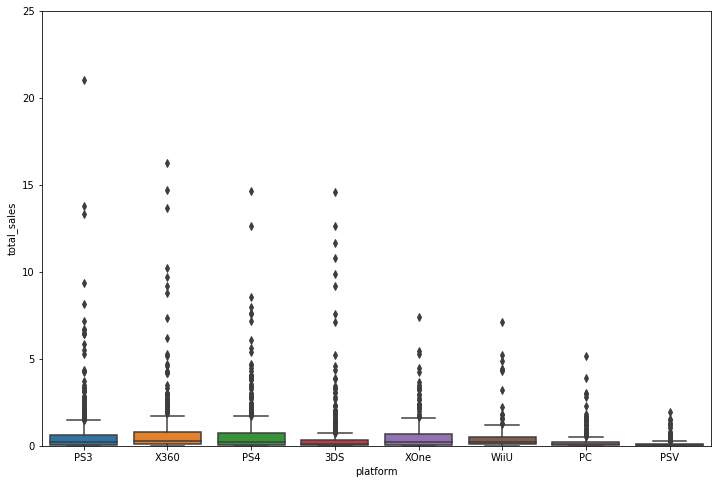

In [111]:
plt.figure(figsize=(12,8))
plt.ylim(0,25)
sns.boxplot(x='platform', y='total_sales', data=data_actual);


**Вывод.** Почти на всех платформах имеются "выбросы", т.е. игры с нехарактерным большим количеством проданных копий более 5 млн. Нет таких хитов продаж только у игр для портативной платформы PSV и почти нет для ПК (за исключением единственного супер-хита Diablo III, получившего очень высокие оценки от критиков и имевшего большой коммерческий успех на всех платформах).

Для более детального рассмотрения характерных значений изменим масштаб графика:

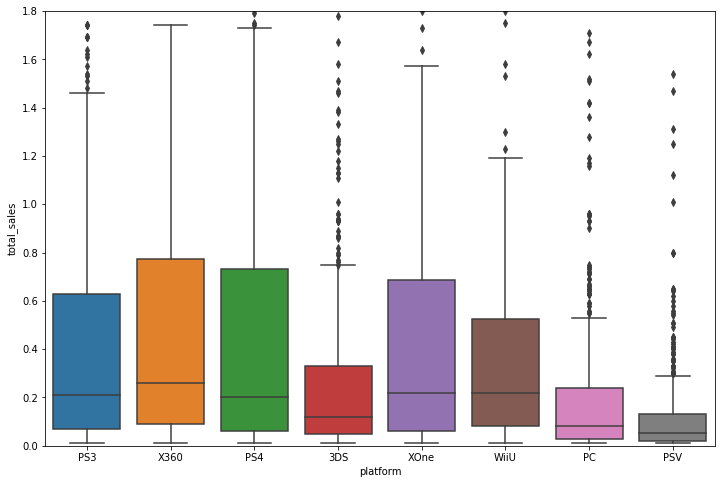

In [112]:
plt.figure(figsize=(12,8))
plt.ylim(0, 1.8)
sns.boxplot(x='platform', y='total_sales', data=data_actual);

**Вывод.** Медианные значения количества проданных копий для большинства платформ схожи и составляют 0,2 - 0,25 млн.копий. Несколько ниже они для портативных устройств (3DS и PSV) и для персональных компьютеров (0,07 - 0,1 млн.копий).
Все наблюдаемые графики со смещением вправо, то есть среднее значение лежит правее (в случае вертикального "ящика" - выше), чем медиана, это логично поскольку среднее значение учитывает хиты продаж.
Наиболее характерные значения для пяти из восьми платформ лежат в диапазоне 0,1 - 0,7 млн.копий (межквартильный интервал). Заметно ниже этот диапазон для портативных устройств (3DS и PSV) и для персональных компьютеров (0,05 - 0,2 млн.копий).

<a id="actual3"></a>
### Анализ влияния отзывов на продажи игр.

Для анализа влияния отзывов пользователей и критиков на продажи игр построим для нескольких популярных платформ диаграммы рассеяния и посчитаем соответсвующие коэффициенты корреляции. Данные будем рассматривать на актуальном периоде.  
На диаграммах рассеяния часть точек будет располагаться вертикально возле оси у, при оценке, равной нулю. Эти точки соответсвуют отсутствующим оценкам. Такие данные для корректного расчета коэффициента корреляции будем отфильтровывать.

<a id="actual4"></a>
#### Анализ влияния отзывов пользователей на продажи игр PS3.

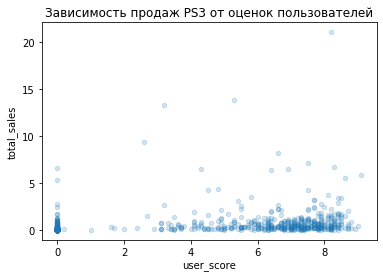

In [113]:
data_actual.query('platform == "PS3"')\
      .plot(x='user_score', y='total_sales', 
      kind='scatter', alpha=0.2, 
      title='''Зависимость продаж PS3 от оценок пользователей''');

In [114]:
print('Коэффициент корреляции между оценками пользователей и объёмами продаж видеоигр на PS3: {:.2f}'.\
      format(
      data_actual.query('platform == "PS3" and user_score > 0')['user_score']\
      .corr(data.query('platform == "PS3"')['total_sales'])))

Коэффициент корреляции между оценками пользователей и объёмами продаж видеоигр на PS3: 0.01


**Вывод.** График на диаграмме рассеяния вытянут горизонтально, коэффициент корреляции близок к нулю - связи между оценками пользователей и объёмами продаж видеоигр на PS3 практически нет.

<a id="actual5"></a>
#### Анализ влияния отзывов критиков на продажи игр PS3.

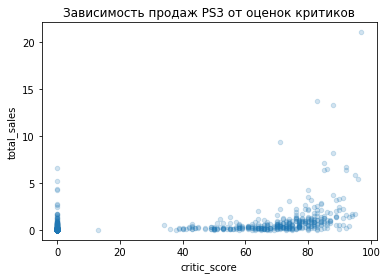

In [115]:
data_actual.query('platform == "PS3"')\
      .plot(x='critic_score', y='total_sales', 
      kind='scatter', alpha=0.2, 
      title='''Зависимость продаж PS3 от оценок критиков''');

In [116]:
print('Коэффициент корреляции между оценками критиков и объёмами продаж видеоигр на PS3: {:.2f}'.\
      format(
      data_actual.query('platform == "PS3" and critic_score > 0')['critic_score']\
      .corr(data.query('platform == "PS3"')['total_sales'])))

Коэффициент корреляции между оценками критиков и объёмами продаж видеоигр на PS3: 0.38


**Вывод.** Коэффициент кореляции равен 0,38, что говорит о наличии слабой связи между оценками критиков и объёмами продаж видеоигр на PS3. Хотя это влияние нельзя назвать сильным, пренебрегать данным фактом в бизнес-процессах нельзя. 

<a id="actual6"></a>
#### Анализ влияния отзывов пользователей на продажи игр X360.

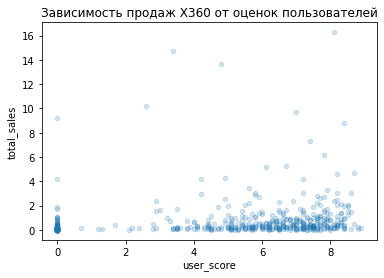

In [117]:
data_actual.query('platform == "X360"')\
      .plot(x='user_score', y='total_sales', 
      kind='scatter', alpha=0.2, 
      title='''Зависимость продаж X360 от оценок пользователей''');

In [118]:
print('Коэффициент корреляции между оценками пользователей и объёмами продаж видеоигр на X360: {:.2f}'.\
      format(
      data_actual.query('platform == "X360" and user_score > 0')['user_score']\
      .corr(data.query('platform == "X360"')['total_sales'])))

Коэффициент корреляции между оценками пользователей и объёмами продаж видеоигр на X360: 0.04


**Вывод.** График на диаграмме рассеяния вытянут горизонтально, коэффициент корреляции близок к нулю - связи между оценками пользователей и объёмами продаж видеоигр на X360 практически нет.

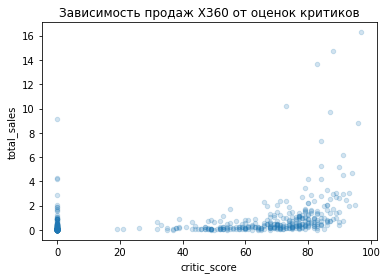

In [119]:
data_actual.query('platform == "X360"')\
      .plot(x='critic_score', y='total_sales', 
      kind='scatter', alpha=0.2, 
      title='''Зависимость продаж X360 от оценок критиков''');

In [120]:
print('Коэффициент корреляции между оценками критиков и объёмами продаж видеоигр на X360: {:.2f}'.\
      format(
      data_actual.query('platform == "X360" and critic_score > 0')['critic_score']\
      .corr(data.query('platform == "X360"')['total_sales'])))

Коэффициент корреляции между оценками критиков и объёмами продаж видеоигр на X360: 0.39


**Вывод.** Коэффициент кореляции равен 0,39, что говорит о наличии слабой связи между оценками критиков и объёмами продаж видеоигр на X360. Хотя это влияние нельзя назвать сильным, пренебрегать данным фактом в бизнес-процессах нельзя. 

<a id="actual7"></a>
#### Анализ влияния отзывов пользователей на продажи игр WiiU.

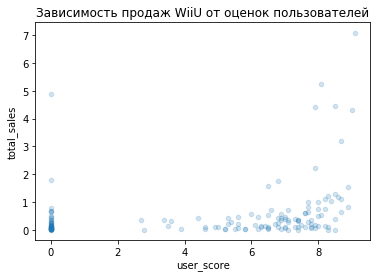

In [121]:
data_actual.query('platform == "WiiU"')\
      .plot(x='user_score', y='total_sales', 
      kind='scatter', alpha=0.2, 
      title='''Зависимость продаж WiiU от оценок пользователей''');

In [122]:
print('Коэффициент корреляции между оценками пользователей и объёмами продаж видеоигр на WiiU: {:.2f}'.\
      format(
      data_actual.query('platform == "WiiU" and user_score > 0')['user_score']\
      .corr(data.query('platform == "WiiU"')['total_sales'])))

Коэффициент корреляции между оценками пользователей и объёмами продаж видеоигр на WiiU: 0.40


**Вывод.** Коэффициент кореляции равен 0,40, что говорит о наличии слабой связи между оценками пользователей и объёмами продаж видеоигр на WiiU. Потребители игр на Nintendo (преимущественно азиатская аудитория) гораздо чаще обращают внимание на оценки пользователей, чем пользователи Европы и Америки. Связь несильная, однако данный факт весьма характерен, и его необходимо использовать в бизнес-процессах. 

<a id="actual8"></a>
#### Анализ влияния отзывов критиков на продажи игр WiiU.

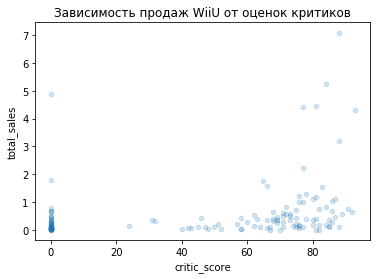

In [123]:
data_actual.query('platform == "WiiU"')\
      .plot(x='critic_score', y='total_sales', 
      kind='scatter', alpha=0.2, 
      title='''Зависимость продаж WiiU от оценок критиков''');

In [124]:
print('Коэффициент корреляции между оценками критиков и объёмами продаж видеоигр на WiiU: {:.2f}'.\
      format(
      data_actual.query('platform == "WiiU" and critic_score > 0')['critic_score']\
      .corr(data.query('platform == "WiiU"')['total_sales'])))

Коэффициент корреляции между оценками критиков и объёмами продаж видеоигр на WiiU: 0.35


**Вывод.** Коэффициент кореляции равен 0,35, что говорит о наличии слабой связи между оценками критиков и объёмами продаж видеоигр на WiiU. Хотя это влияние нельзя назвать сильным, пренебрегать данным фактом в бизнес-процессах нельзя. 

<a id="actual9"></a>
#### Вывод по разделу 4.2.
Для текущей ситуации характерно наличие слабой связи между оценками критиков и объёмами продаж игр на популярных платформах.  
Иначе выглядит картина с оценками пользователей: потребители Nintendo (WiiU)  гораздо чаще отдают предпочтение играм с высокими оценками игроков, чем пользователи других платформ. Однако, и в этом случае зависимость сильной назвать нельзя.

<a id="genre1"></a>
## Анализ жанров видеоигр на актуальном периоде.

<a id="genre2"></a>
### Анализ количества игр в каждом жанре.

Построим график для анализа зависимости количества игр от жанра.

In [125]:
data_actual['genre'].value_counts()

Action          1112
Role-Playing     388
Sports           335
Shooter          331
Adventure        289
Misc             258
Racing           175
Fighting         143
Simulation       125
Platform         104
Strategy         100
Puzzle            43
Name: genre, dtype: int64

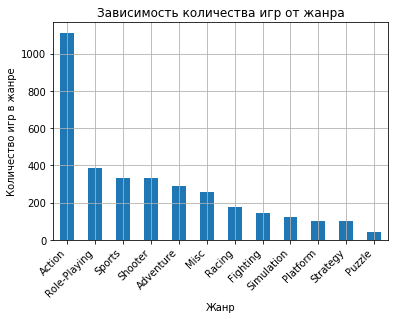

In [126]:
data_actual['genre'].value_counts().plot(kind='bar', grid=True)
plt.xticks(rotation=45, ha='right')
plt.title('Зависимость количества игр от жанра')
plt.xlabel('Жанр')
plt.ylabel('Количество игр в жанре')
plt.show();

**Вывод.** Самый популярный жанр видеоигр - это Action. Остальные популярные жанры RPG, Sports, Shooter и Adventure отстают от Action более чем в три раза по количеству игр.

*Примечание. Жанр Misc - сокращение от англ. "miscellaneous" - прочее или разное.*

<a id="genre22"></a>
### Анализ жанров игр на продаваемость.

Проанализируем самые продаваемые жанры игр. Для этого создадим сводную таблицу по жанрам, в которой будут учтены:
- количество игр в жанре (с помощью функции 'count'),
- суммарное количество проданных копий игр в жанре (с помощью функции 'sum'),
- среднее количество проданных копий одной игры в жанре (с помощью функции 'mean').
Отсортируем данные по среденму количеству проданных копий одной игры.

In [127]:
genre_total_sales = data_actual\
.pivot_table(index='genre', values='total_sales', aggfunc={'sum', 'mean', 'count'})\
.sort_values(by='mean', ascending=False)\
.style.format('{:.2f}')

genre_total_sales

,count,mean,sum
genre,,,
Shooter,331.00,1.22,404.84
Platform,104.00,0.79,82.22
Sports,335.00,0.66,222.07
Role-Playing,388.00,0.58,224.43
Racing,175.00,0.50,86.89
Action,1112.00,0.47,524.30
Fighting,143.00,0.45,63.72
Simulation,125.00,0.39,48.55
Misc,258.00,0.36,92.99


**Вывод**. Несмотря на то что, общее количество игр и суммарные продажи в жанре Action намного опережают игры иных жанров, можно сказать, что лучше всего продаются игры жанра Shooter - более 1,2 млн. проданных копий в среднем на одну игру. Далее со значительным отставанием идут игры жанров Platform и Sports (0,79 и 0,66 млн. проданных копий в среднем на игру соответственно).  
Хуже всего продаются игры жанров Puzzle, Strategy и Adventure (0,19, 0,17 и 0,14 млн. проданных копий в среднем на игру соответственно). Причем жанр Adventure входит в ТОП-5 по количеству выпущенных игр, а по средней продаваемости занимает последнее место.  
Самый популярный по количеству игр жанр Action по средней продаваемости занимает место в середине списка.

*Примечание. Жанр Misc - сокращение от англ. "miscellaneous" - прочее или разное.*

<a id="genre3"></a>
### Анализ количества игр в каждом жанре для разных платформ.

Сформируем сводную таблицу по жанрам, в которой для каждой из платформ на актуальном периоде будет рассчитана доля игр данного жанра.

In [128]:
genre_platforms_sales = data_actual\
.pivot_table(index='genre', columns='platform', values='total_sales', aggfunc='sum')\
.apply(lambda x: x / x.sum())\
.style.format('{:.0%}')

genre_platforms_sales

platform,3DS,PC,PS3,PS4,PSV,WiiU,X360,XOne
genre,,,,,,,,
Action,22%,20%,36%,31%,31%,23%,29%,23%
Adventure,2%,2%,3%,2%,7%,0%,2%,2%
Fighting,4%,0%,5%,3%,5%,8%,3%,2%
Misc,4%,1%,4%,3%,8%,15%,8%,5%
Platform,13%,0%,3%,2%,5%,26%,1%,1%
Puzzle,2%,1%,0%,0%,0%,2%,0%,nan%
Racing,6%,2%,4%,4%,5%,10%,5%,6%
Role-Playing,33%,23%,9%,9%,23%,4%,5%,7%
Shooter,0%,24%,22%,28%,7%,7%,31%,38%


**Выводы:** 
- Игры жанра Action выходят на всех платформах без исключения. Видимо этим объясняется значительный отрыв данного жанра от остальных по количеству игр,
- Значительные объёмы игр жанра Platform выходят для устройств Nintendo (WiiU и 3DS),
- Игры жанров Shooter и Sports редко выходят для портативных устройств (PSV и 3DS) и консоли WiiU,
- Игры жанра Simulation выходят почти исключительно для ПК и портативного устройства Nintendo 3DS,
- Значительные объёмы игр жанра RPG выходят для портативных устройств (PSV и 3DS) и ПК,
- Игры жанра Strategy выходят почти исключительно для ПК.

<a id="region1"></a>
## Анализ особенностей региона на продажи игр.

<a id="region2"></a>
### Определение популярных платформ для каждого региона.

<a id="region3"></a>
#### Платформы, популярные в Северной Америке.

Для данной задачи создадим сводную таблицу platform_na_sales по платформам, просуммировав продажи в Северной Америке. Затем добавим в таблицу столбец 'ratio', в котором будет отражена доля продаж по каждой платформе.  
Выведем на экран результат.

In [129]:
pd.set_option('display.float_format', '{:.2f}'.format)
platform_na_sales = data_actual\
.pivot_table(index='platform', values='na_sales', aggfunc={'sum'})\
.sort_values(by='sum', ascending=False)

platform_na_sales['ratio'] = platform_na_sales['sum'] / data_actual['na_sales'].sum()

platform_na_sales

,sum,ratio
platform,,
X360,233.53,0.30
PS3,171.62,0.22
PS4,108.74,0.14
XOne,93.12,0.12
3DS,83.49,0.11
WiiU,38.10,0.05
PC,31.07,0.04
PSV,12.58,0.02


Для лучшей визуализации на основании полученной таблицы platform_na_sales построим круговую диаграмму:

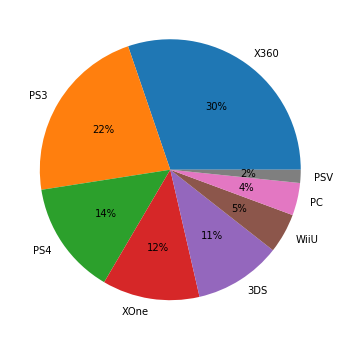

In [130]:
platform_na_sales\
.plot(kind='pie', y='ratio', label='', legend=False, figsize=(6, 6), autopct='%.0f%%');

**Вывод.** Более половины (52%) продаж в Северной Америке приходится на популярные платформы предыдущего поколения (PS3 и Х360) и ещё около четверти (26%) - на их обновления (PS4 и XOne). Доли продаж игр для Nintendo и портативных устройств невелики (16% и 13% соответственно). Доля продаж игр для ПК мала - всего 4%.  
ТОП-5 популярных платформ (в порядке убывания доли):
- Х360,
- PS3,
- PS4,
- XOne,
- 3DS. 

<a id="region4"></a>
#### Платформы, популярные в Европе.

Для данной задачи создадим сводную таблицу platform_eu_sales по платформам, просуммировав продажи в Европе. Затем добавим в таблицу столбец 'ratio', в котором будет отражена доля продаж по каждой платформе.
Выведем на экран результат.

In [131]:
platform_eu_sales = data_actual\
.pivot_table(index='platform', values='eu_sales', aggfunc={'sum'})\
.sort_values(by='sum', ascending=False)

platform_eu_sales['ratio'] = platform_eu_sales['sum'] / data_actual['eu_sales'].sum()

platform_eu_sales

,sum,ratio
platform,,
PS3,166.18,0.26
PS4,141.09,0.22
X360,119.54,0.19
3DS,61.48,0.10
PC,58.77,0.09
XOne,51.59,0.08
WiiU,25.13,0.04
PSV,13.12,0.02


Для лучшей визуализации на основании полученной таблицы platform_eu_sales построим круговую диаграмму:

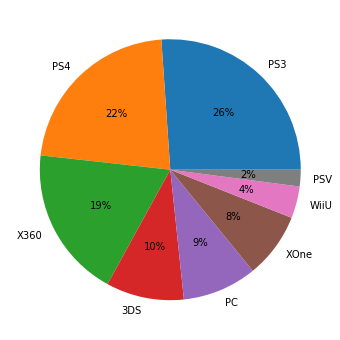

In [132]:
platform_eu_sales\
.plot(kind='pie', y='ratio', label='', legend=False, figsize=(6, 6), autopct='%.0f%%');

**Вывод.** Около половины (48%) продаж в Европе приходится на платформы Sony (PS3 и PS4), доля Microsoft (XOne и X360) значительно ниже - 27%.  
Доля новинок в Европе относительно платформ-предшественников выше, чем в Америке: PS4  в сумме с XOne - 30%, а PS3 с X360 - 45% (в 1,5 раза меньше, а для Америки этот показатель равен 2). Доли продаж игр для Nintendo и портативных устройств невелики (14 и 12% соответственно). Доля продаж игр для ПК 9%, что в 2 раза выше, чем в Северной Америке.  
ТОП-5 популярных платформ (в порядке убывания доли):
- PS3,
- PS4,
- X360,
- 3DS,
- PC.

<a id="region5"></a>
#### Платформы, популярные в Японии.

Выполним аналогичные действия и построим круговую диаграмму.

In [133]:
platform_jp_sales = data_actual\
.pivot_table(index='platform', values='jp_sales', aggfunc={'sum'})\
.sort_values(by='sum', ascending=False)

platform_jp_sales['ratio'] = platform_jp_sales['sum'] / data_actual['jp_sales'].sum()

platform_jp_sales

,sum,ratio
platform,,
3DS,100.67,0.49
PS3,50.17,0.24
PSV,21.91,0.11
PS4,15.96,0.08
WiiU,13.01,0.06
X360,3.48,0.02
XOne,0.34,0.00
PC,0.00,0.00


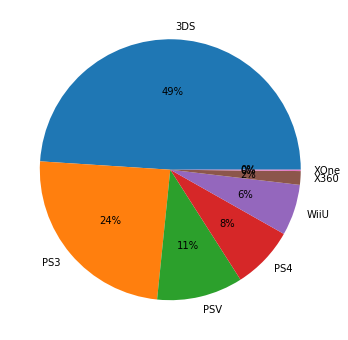

In [134]:
platform_jp_sales\
.plot(kind='pie', y='ratio', label='', legend=False, figsize=(6, 6), autopct='%.0f%%');

**Вывод**. Подавляющая доля продаж (49%) в Японии приходится на игры для портативного устройства Nintendo (3DS). В сумме с долей WiiU Nintendo забирает более половины продаж (55%) на рынке. Sony немного отстает (43%), а на долю Microsoft остается всего 2% продаж.  
Самая значительная доля по всем регионам и платформам наблюдается в Японии по продажам игр для портативных устройств: 60% продаж приходится суммарно на 3DS и PSV.  
Япония - удивительный регион! Игры для персональных компьютеров там не продают. Видимо японцы используют эти устройства исключительно для работы.  
ТОП-5 популярных платформ (в порядке убывания доли):
- 3DS,
- PS3,
- PSV,
- PS4,
- WiiU.

<a id="region6"></a>
#### Платформы, популярные в других регионах.

Выполним аналогичные действия и построим круговую диаграмму.

In [135]:
platform_other_sales = data_actual\
.pivot_table(index='platform', values='other_sales', aggfunc={'sum'})\
.sort_values(by='sum', ascending=False)

platform_other_sales['ratio'] = platform_other_sales['sum'] / data_actual['other_sales'].sum()

platform_other_sales

,sum,ratio
platform,,
PS3,65.91,0.33
PS4,48.35,0.24
X360,34.01,0.17
XOne,14.27,0.07
3DS,13.36,0.07
PC,11.60,0.06
PSV,6.46,0.03
WiiU,5.95,0.03


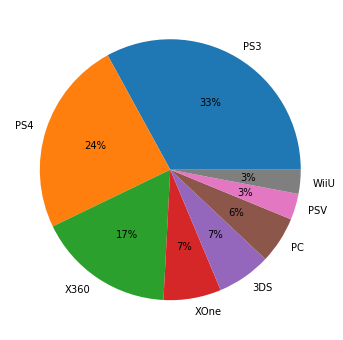

In [136]:
platform_other_sales\
.plot(kind='pie', y='ratio', label='', legend=False, figsize=(6, 6), autopct='%.0f%%');

**Вывод.** По другим регионам наблюдается картина, аналогичная Северной Америке: половина (50%) продаж приходится на популярные платформы предыдущего поколения (PS3 и Х360) и ещё около трети (31%) - на их обновления (PS4 и XOne). Доли продаж игр для Nintendo и портативных устройств невелики (по 10%). Доля продаж игр для ПК мала - 6%.  
ТОП-5 популярных платформ (в порядке убывания доли):
- PS3,
- PS4,
- Х360,
- XOne,
- 3DS.

<a id="region7"></a>
### Определение популярных жанров для каждого региона.

Для данной задачи проведём исследование, аналогичное предыдущему разделу: для каждого региона создадим сводную таблицу по жанрам, просуммировав продажи в регионе. Затем добавим в таблицу столбец 'ratio', в котором будет отражена доля продаж по каждому жанру.
Выведем на экран результат. Построим круговую диаграмму.

<a id="region8"></a>
#### Жанры, популярные в Северной Америке.

In [137]:
genre_na_sales = data_actual\
.pivot_table(index='genre', values='na_sales', aggfunc={'sum'})\
.sort_values(by='sum', ascending=False)

genre_na_sales['ratio'] = genre_na_sales['sum'] / data_actual['na_sales'].sum()

genre_na_sales.head(10)

,sum,ratio
genre,,
Action,215.08,0.28
Shooter,194.94,0.25
Sports,102.62,0.13
Role-Playing,79.74,0.10
Misc,47.33,0.06
Platform,35.00,0.05
Fighting,30.80,0.04
Racing,30.49,0.04
Simulation,14.36,0.02


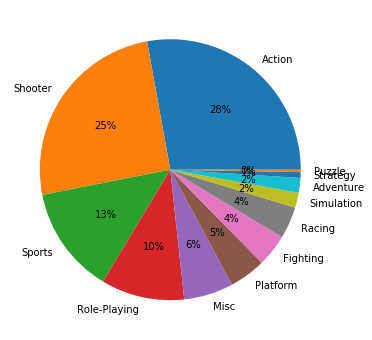

In [138]:
genre_na_sales\
.plot(kind='pie', y='ratio', label='', legend=False, figsize=(6, 6), autopct='%.0f%%');

**Вывод.** В Северной Америке наиболее популярны игры с активным действием: жанры Action и Shooter опережают следующие жанры в два раза.  
ТОП-5 популярных жанров (в порядке убывания):
- Action,
- Shooter,
- Sports,
- Role-Playing,
- Platform.

<a id="region9"></a>
#### Жанры, популярные в Европе.

In [139]:
genre_eu_sales = data_actual\
.pivot_table(index='genre', values='eu_sales', aggfunc={'sum'})\
.sort_values(by='sum', ascending=False)

genre_eu_sales['ratio'] = genre_eu_sales['sum'] / data_actual['eu_sales'].sum()

genre_eu_sales.head(10)

,sum,ratio
genre,,
Action,190.42,0.30
Shooter,149.10,0.23
Sports,83.60,0.13
Role-Playing,60.29,0.09
Racing,40.66,0.06
Platform,28.57,0.04
Misc,24.99,0.04
Simulation,19.34,0.03
Fighting,15.84,0.02


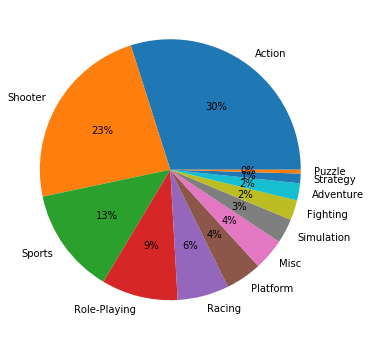

In [140]:
genre_eu_sales\
.plot(kind='pie', y='ratio', label='', legend=False, figsize=(6, 6), autopct='%.0f%%');

**Вывод.** В Европе картина по жанрам аналогична Северной Америке, наиболее популярные игры с активным действием: жанры Action и Shooter в сумме составляют те же 53% и далеко опережают следующие жанры.   
ТОП-5 популярных жанров (в порядке убывания):

- Action,
- Shooter,
- Sports,
- Role-Playing,
- Racing.

<a id="region10"></a>
#### Жанры, популярные в Японии.

In [141]:
genre_jp_sales = data_actual\
.pivot_table(index='genre', values='jp_sales', aggfunc={'sum'})\
.sort_values(by='sum', ascending=False)

genre_jp_sales['ratio'] = genre_jp_sales['sum'] / data_actual['jp_sales'].sum()

genre_jp_sales.head(10)

,sum,ratio
genre,,
Role-Playing,65.29,0.32
Action,57.08,0.28
Misc,11.98,0.06
Shooter,11.98,0.06
Simulation,11.44,0.06
Platform,10.93,0.05
Fighting,10.64,0.05
Sports,8.38,0.04
Adventure,7.63,0.04


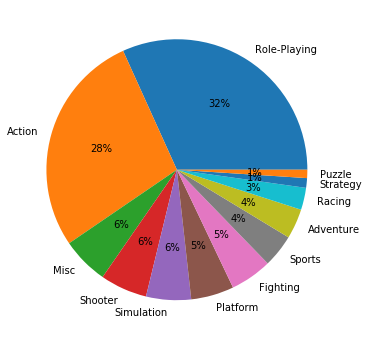

In [142]:
genre_jp_sales\
.plot(kind='pie', y='ratio', label='', legend=False, figsize=(6, 6), autopct='%.0f%%');

**Вывод.** Ожидаемо, предпочтения потребителей в Японии отличаются от Европы и Северной Америки: наиболее популярны более спокойные игры жанра Role-Playing	(игры с чётким сюжетом, квесты и т.п.). Доля игр жанра Shooter сотавляет всего 6%, то есть в 4 раза меньше, чем в Европе и Америке. Игры жанра Simulation в Японии в 2-3 раза популярнее, чем в Европе и Америке.  
ТОП-5 популярных жанров (в порядке убывания):

- Role-Playing,
- Action,
- Shooter,
- Simulation,
- Platform.

<a id="region11"></a>
#### Жанры, популярные в других регионах.

In [143]:
genre_other_sales = data_actual\
.pivot_table(index='genre', values='other_sales', aggfunc={'sum'})\
.sort_values(by='sum', ascending=False)

genre_other_sales['ratio'] = genre_other_sales['sum'] / data_actual['other_sales'].sum()

genre_other_sales.head(10)

,sum,ratio
genre,,
Action,61.72,0.31
Shooter,48.82,0.24
Sports,27.47,0.14
Role-Playing,19.11,0.10
Racing,10.12,0.05
Misc,8.69,0.04
Platform,7.72,0.04
Fighting,6.44,0.03
Adventure,4.15,0.02


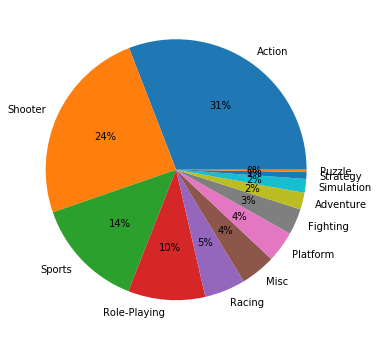

In [144]:
genre_other_sales\
.plot(kind='pie', y='ratio', label='', legend=False, figsize=(6, 6), autopct='%.0f%%');

**Вывод.** В других регионах предпочтения потребителей по жанрам ближе всего соответствуют ситуации в Европе. Наиболее популярные игры с активным действием: жанры Action и Shooter (31% и 24% соответственно).  
ТОП-5 популярных жанров (в порядке убывания):

- Action,
- Shooter,
- Sports,
- Role-Playing,
- Racing.

<a id="rating1"></a>
### Влияние рейтинга игры ESRB на продажи в каждом регионе.

Для данной задачи проведём исследование, аналогичное предыдущим разделам (6.1 и 6.2): для каждого региона создадим сводную таблицу по рейтингам, просуммировав продажи в регионе. Затем добавим в таблицу столбец 'ratio', в котором будет отражена доля продаж по каждому рейтингу. По результатам построим круговую диаграмму.

<a id="rating2"></a>
#### Рейтинги игр, популярных в Северной Америке.

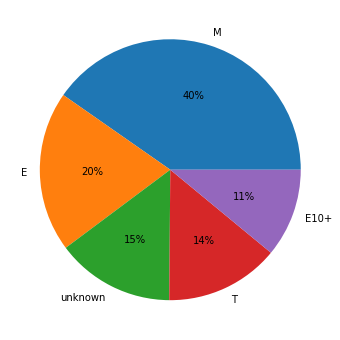

In [145]:
rating_na_sales = data_actual\
.pivot_table(index='rating', values='na_sales', aggfunc={'sum'})\
.sort_values(by='sum', ascending=False)

rating_na_sales['ratio'] = rating_na_sales['sum'] / data_actual['na_sales'].sum()

rating_na_sales.plot(kind='pie', y='ratio', label='', legend=False, figsize=(6, 6), autopct='%.0f%%');

**Вывод**. В Северной Америке лучше всего (40%) продаются игры с рейтингом "М" (для взрослых) - это игры содержащие сцены насилия, ненормативную лексику и т.п.  
Доля игр с отсутствующим рейтингом - 15%.

<a id="rating3"></a>
#### Рейтинги игр, популярных в Европе.

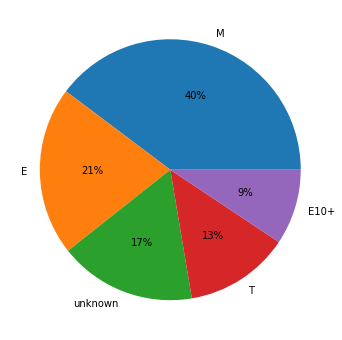

In [146]:
rating_eu_sales = data_actual\
.pivot_table(index='rating', values='eu_sales', aggfunc={'sum'})\
.sort_values(by='sum', ascending=False)

rating_eu_sales['ratio'] = rating_eu_sales['sum'] / data_actual['eu_sales'].sum()

rating_eu_sales.plot(kind='pie', y='ratio', label='', legend=False, figsize=(6, 6), autopct='%.0f%%');

**Вывод.** В Европе картина анлогичная Северной Америке: лучше всего (40%) продаются игры с рейтингом "М" (для взрослых).  
Доля игр с отсутствующим рейтингом - 17%.

<a id="rating4"></a>
#### Рейтинги игр, популярных в Японии.

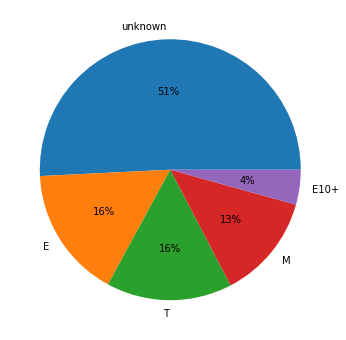

In [147]:
rating_jp_sales = data_actual\
.pivot_table(index='rating', values='jp_sales', aggfunc={'sum'})\
.sort_values(by='sum', ascending=False)

rating_jp_sales['ratio'] = rating_jp_sales['sum'] / data_actual['jp_sales'].sum()

rating_jp_sales.plot(kind='pie', y='ratio', label='', legend=False, figsize=(6, 6), autopct='%.0f%%');

**Вывод.** В отличие от Европы и Америки игры с рейтингом "М" (для взрослых) гораздо менее популярны в Японии (всего 13% против 40% в Европе и Америке).  
Игр с рейтингом "М", "Т" и "Е" (для взрослых, для подростков и для всех) продаётся примерно одинаковое количество: 16%, 16% и 13% соответственно.  
Самая большая доля продаж (51%) - у игр, не имеющих рейтинга.

<a id="rating5"></a>
#### Рейтинги игр, популярных в других регионах.

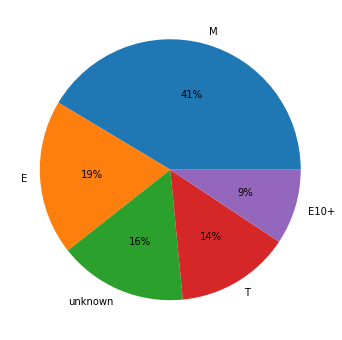

In [148]:
rating_other_sales = data_actual\
.pivot_table(index='rating', values='other_sales', aggfunc={'sum'})\
.sort_values(by='sum', ascending=False)

rating_other_sales['ratio'] = rating_other_sales['sum'] / data_actual['other_sales'].sum()

rating_other_sales.plot(kind='pie', y='ratio', label='', legend=False, figsize=(6, 6), autopct='%.0f%%');

**Вывод.** В других регионах картина с рейтингами игр соответсвует данным по Европе и Северной Америке. Лучше всего (41%) продаются игры с рейтингом "М" (для взрослых).  
Доля игр с отсутствующим рейтингом - 16%.

<a id="hyp1"></a>
## Проверка гипотез.

<a id="hyp2"></a>
### Проверка гипотезы о равенстве отзывов пользователей платформ Xbox One и PC.

Сформулируем гипотезы:

- Нулевая гипотеза: средние пользовательские отзывы для платформ Xbox One и PC одинаковые.
- Альтернативная гипотеза: средние пользовательские отзывы для платформ Xbox One и PC различаются.

Подготовим две выборки данных data_actual_xone и data_actual_pc, у которых присутствуют отзывы пользователей, т.е. user_score > 0:

In [149]:
data_actual_xone = data_actual.query('platform == "XOne" and user_score > 0')
data_actual_pc = data_actual.query('platform == "PC" and user_score > 0')

Для проверки гипотез воспользуемся методом scipy.stats.ttest_ind() и зададим уровень статистической значимости 5%:

In [150]:
alpha = 0.05 # задаем уровень статистической значимости 5%

results = st.ttest_ind(
    data_actual_xone['user_score'], 
    data_actual_pc['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

p-значение: 0.7164915830885942
Не отвергаем нулевую гипотезу


**Вывод.** Вероятность получить случайно такое же или большее различие в средних составляет 71,6%, это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними значениями оценок в двух выборках.

В соответствии с полученными данными нулевую гипотезу о равенстве средних оценок пользователей для платформ Xbox One и PC отвергнуть нельзя.

<a id="hyp4"></a>
### Проверка гипотезы о равенстве отзывов пользователей для игр жанров Action и Sports.

Сформулируем гипотезы:

- Нулевая гипотеза: средние пользовательские отзывы от покупателей игр жанров Action и Sports одинаковые.
- Альтернативная гипотеза: средние пользовательские отзывы от покупателей игр жанров Action и Sports различаются.

Подготовим две выборки данных data_actual_action и data_actual_sports, у которых присутствуют отзывы пользователей, т.е. user_score > 0:

In [151]:
data_actual_action = data_actual.query('genre == "Action" and user_score > 0')
data_actual_sports = data_actual.query('genre == "Sports" and user_score > 0')

Для проверки гипотез воспользуемся методом scipy.stats.ttest_ind() и зададим уровень статистической значимости 5%:

In [152]:
alpha = 0.05 # задаем уровень статистической значимости 5%

results = st.ttest_ind(
    data_actual_action['user_score'], 
    data_actual_sports['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

p-значение: 2.960656896734379e-19
Отвергаем нулевую гипотезу


**Вывод.** Вероятность получить случайно такое же или большее различие в средних близка к нулю, это позволяет сделать вывод о значимом различии между средними значениями оценок в двух выборках.

В соответствии с полученными данными нулевую гипотезу о равенстве средних пользовательских отзывов от покупателей игр жанров Action и Sports необходимо отвергнуть в пользу альтернативной гипотезы: средние пользовательские отзывы от покупателей игр жанров Action и Sports различаются.

<a id="res"></a>
## Общий вывод.

На основании проведенного анализа данных о продажах видеоигр за длительный период времени можно сделать следующие выводы и дать рекомендации для планирования бизнес-процессов и рекламных кампаний интернет-магазина:
- В настоящее время (с 2012 года) на рынке видеоигр в целом наблюдается падение объёмов продаж.
- В среднем по индустрии для трёх главных производителей картина с выпуском новых платформ следующая: новинки консолей появляются каждые 5-6 лет, новые портативные устройства выходят на рынок каждые 7 лет.
- Актуальным периодом, на котором проводился анализ данных в целях выявления актуальных закономерностей, выбран период с 2011 года по 2016 год.
- Перспективными платформами, показывающими рост объёмов продаж являются PS4 и XOne, игры для платформ PSV, WiiU и для персональных компьютеров показывают стабильные объёмы продаж. Все перечисленные платформы являются перспективными для активных рекламных кампаний и продвижения соответствующих продуктов на рынке.
- Для текущей ситуации характерно наличие незначительной связи между оценками критиков и объёмами продаж игр на популярных платформах, такую связь необходимо учитывать при планировании бизнес-процессов. Несколько иначе выглядит картина с оценками пользователей: потребители Nintendo (WiiU) гораздо чаще отдают предпочтение играм с высокими оценками игроков, чем пользователи других платформ, которые практически не обращают внимания на данные оценки.
- Самый популярный жанр по количеству игр - это Action. Остальные популярные жанры RPG, Sports, Shooter и Adventure отстают от Action более чем в три раза по количеству игр. Игры жанра Action выходят на всех платформах без исключения. Другие жанры игр имеют разброс в зависимости от платформы.
- Лучше всего продаются игры жанра Shooter - более 1,2 млн. проданных копий в среднем на одну игру. Далее со значительным отставанием идут игры жанров Platform и Sports (0,79 и 0,66 млн. проданных копий в среднем на игру соответственно). Хуже всего продаются игры жанров Puzzle, Strategy и Adventure (0,19, 0,17 и 0,14 млн. проданных копий в среднем на игру соответственно). Самый популярный по количеству игр жанр Action по средней продаваемости занимает место в середине списка.
- Региональные предпочтения по платформам для потребителей Японии сильно отличаются от всего остального мира. В Японии подавляющая доля продаж (49%) приходится на игры для портативного устройства Nintendo (3DS); в сумме с долей WiiU Nintendo забирает более половины продаж (55%) на рынке; Sony отстает (43%); на долю Microsoft остается всего 2% продаж; игры для ПК практически не продаются. В остальном мире около половины продаж приходится на популярные платформы предыдущего поколения (PS3 и Х360) и ещё около четверти - на их обновления (PS4 и XOne). Доли продаж игр для Nintendo и портативных устройств невелики; меньше всего продются игры для ПК. В соответствии с этими данными можно строить рекламные кампании: отдельно для Японии и всего остального мира.
- Региональные предпочтения по жанрам для потребителей Японии сильно отличаются от всего остального мира. В Японии наиболее популярны более спокойные игры жанра Role-Playing (игры с чётким сюжетом, квесты и т.п.); доля игр жанра Shooter сотавляет всего 6%, то есть в 4 раза меньше, чем в Европе и Америке; игры жанра Simulation в Японии в 2-3 раза популярнее, чем в Европе и Америке. В остальном мире наиболее популярные игры с активным действием: жанры Action и Shooter (около трети и четверти от всех продаж соответственно). В соответствии с этими данными можно строить рекламные кампании: отдельно для Японии и всего остального мира.
- Региональные предпочтения игр с разными рейтингами ESRB для потребителей Японии сильно отличаются от всего остального мира. Во всем мире (кроме Японии) лучше всего (около 40%) продаются игры с рейтингом "М" (для взрослых). В Японии игры с рейтингом "М" гораздо менее популярны (13%). А самая большая доля продаж (51%) - у игр, не имеющих рейтинга. В соответствии с этими данными можно строить рекламные кампании: отдельно для Японии и всего остального мира.
- Гипотезу о равенстве средних оценок пользователей для платформ Xbox One и PC отвергнуть нельзя.
- Гипотезу о равенстве средних пользовательских отзывов от покупателей игр жанров Action и Sports необходимо отвергнуть в пользу альтернативной гипотезы: средние пользовательские отзывы от покупателей игр жанров Action и Sports различаются.


